# Digital Marketing Conversion Prediction Project

This notebook was prepared by Mario Paulin to demonstrate a complete end-to-end data science project for predicting customer conversion in digital marketing campaigns. The analysis follows an structured approach covering data acquisition, exploratory data analysis, feature engineering, model development, and business insights.

# Data Science Project
## Reproducibility Checklist

** Option 1: Automatic Setup (Recommended)**
1. [ ] Run the first two code cells to install libraries
2. [ ] Follow the one-time Kaggle setup when prompted
3. [ ] Dataset downloads automatically - analysis begins!

**📁 Option 2: Manual Setup**
1. [ ] Download dataset from [Kaggle](https://www.kaggle.com/datasets/rabieelkharoua/predict-conversion-in-digital-marketing-dataset)
2. [ ] Create `data/` folder and place CSV file inside
3. [ ] Run all cells - analysis begins with your local data!


### Structure
- [ ] Complete EDA 
- [ ] Feature engineering and selection
- [ ] Multiple ML models (Logistic Regression, XGBoost)
- [ ] Insights

---

## Project Objective

The objective of this project is to analyze a digital marketing dataset and build a predictive model to identify the main factors associated with customer conversion. We aim to optimize marketing spend allocation by understanding which channels, campaigns, and customer characteristics drive the highest conversion rates.

**Business Problem**: Predict customer conversion to optimize marketing spend allocation across different channels and campaigns.

**Key Business Questions**:
- Which channels drive highest conversion rates?
- What's the optimal ad spend sweet spot?
- Do email engagement metrics predict conversion?
- Which customer demographics convert best?
- How can we improve ROI across different campaign types?

# Data Processing and EDA

We begin by downloading the dataset from Kaggle and conducting initial data quality checks and basic exploratory analysis.

In [155]:
### This cell will load all the required libraries for the entire project
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb
from scipy.stats import chi2_contingency
import warnings
import os
import sys
import zipfile
import kaggle ### Coment this line if kaggle is not installed and the data will be downloaded manually or through github
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import time
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("All libraries loaded successfully!")

All libraries loaded successfully!


## Data Loading

**Setup Requirements:**
- Kaggle account and API credentials (`kaggle.json`)
- Or manual download of the dataset to `data/` folder

In [156]:
# Easy setup for downloading Kaggle dataset


def setup_kaggle_and_download():
    """
    Download the actual Kaggle dataset with easy setup for reproducibility
    """
    # Check if kaggle.json exists
    kaggle_dir = os.path.expanduser("~/.kaggle")
    kaggle_json_path = os.path.join(kaggle_dir, "kaggle.json")
    
    # Also check current directory
    current_dir_kaggle = "./kaggle.json"
    ### Ignore if not using kaggle
    if not os.path.exists(kaggle_json_path) and not os.path.exists(current_dir_kaggle):
        print("KAGGLE SETUP REQUIRED (One-time setup):")
        print("=" * 60)
        print("1. Go to https://www.kaggle.com/account")
        print("2. Scroll down to 'API' section")
        print("3. Click 'Create New API Token' to download kaggle.json")
        print("4. Place the kaggle.json file in one of these locations:")
        print(f"   Option A: {kaggle_json_path}")
        print(f"   Option B: {os.path.abspath(current_dir_kaggle)} (current directory)")
        print("5. Run this cell again after placing the file")
        print("=" * 60)
        print("Note: This is a one-time setup. Once done, the dataset will download automatically!")
        return None
    
    # Create data directory if it doesn't exist
    os.makedirs("data", exist_ok=True)
    
    # Download the dataset
    try:
        print(" Downloading digital marketing dataset from Kaggle...")
        from kaggle.api.kaggle_api_extended import KaggleApi
        
        api = KaggleApi()
        api.authenticate()
        
        # Download the specific dataset
        dataset_name = "rabieelkharoua/predict-conversion-in-digital-marketing-dataset"
        api.dataset_download_files(dataset_name, path="data", unzip=True)
        
        print("Dataset downloaded successfully!")
        
        # Find the CSV file (it might have a different name)
        data_files = [f for f in os.listdir("data") if f.endswith('.csv')]
        if data_files:
            csv_file = data_files[0]
            print(f"📄 Found data file: {csv_file}")
            return os.path.join("data", csv_file)
        else:
            print(" No CSV file found in downloaded data")
            return None
            
    except Exception as e:
        print(f" Error downloading dataset: {str(e)}")
        print(" Manual Alternative:")
        print("1. Visit: https://www.kaggle.com/datasets/rabieelkharoua/predict-conversion-in-digital-marketing-dataset")
        print("2. Click 'Download' to get the dataset")
        print("3. Extract and place the CSV file in the 'data' folder")
        print("4. Re-run this cell")
        return None

# Load the Digital Marketing Dataset from Kaggle

import os

# Check if data already exists locally
if os.path.exists("data") and os.listdir("data"):
    csv_files = [f for f in os.listdir("data") if f.endswith('.csv')]
    if csv_files:
        data_path = os.path.join("data", csv_files[0])
        data = pd.read_csv(data_path)
    else:
        raise FileNotFoundError("No CSV files found in data folder")
else:
    # Download from Kaggle
    try:
        # Install and import kaggle if needed
        try:
            import kaggle
        except ImportError:
            print("Installing Kaggle API...")
            import subprocess
            import sys
            subprocess.check_call([sys.executable, "-m", "pip", "install", "kaggle"])
            import kaggle
        
        # Create data directory
        os.makedirs("data", exist_ok=True)
        
        # Download dataset
        print("Downloading dataset from Kaggle...")
        from kaggle.api.kaggle_api_extended import KaggleApi
        api = KaggleApi()
        api.authenticate()
        api.dataset_download_files("rabieelkharoua/predict-conversion-in-digital-marketing-dataset", 
                                   path="data", unzip=True)
        
        # Load the downloaded file
        csv_files = [f for f in os.listdir("data") if f.endswith('.csv')]
        if not csv_files:
            raise FileNotFoundError("No CSV files found after download")
            
        data_path = os.path.join("data", csv_files[0])
        data = pd.read_csv(data_path)
        
    except Exception as e:
        print(f" Error loading dataset: {str(e)}")
        print(" To fix this:")
        print("1. Set up Kaggle API credentials (kaggle.json)")
        print("2. Or manually download from: https://www.kaggle.com/datasets/rabieelkharoua/predict-conversion-in-digital-marketing-dataset")
        print("3. Place the CSV file in a 'data' folder")
        raise


In [157]:
# Display first few rows to understand the data structure
print("First 5 rows of the dataset:")
data.head()

First 5 rows of the dataset:


CustomerID  Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0        8000   56  Female  136912    Social Media    Awareness  6497.870068   
1        8001   69    Male   41760           Email    Retention  3898.668606   
2        8002   46  Female   88456             PPC    Awareness  1546.429596   
3        8003   32  Female   44085             PPC   Conversion   539.525936   
4        8004   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919        0.088031              0       2.399017    7.396803   
1          0.155725        0.182725             42       2.917138    5.352549   
2          0.277490        0.076423              2       8.223619   13.794901   
3          0.137611        0.088004             47       4.540939   14.688363   
4          0.252851        0.109940              0       2.046847   13.993370   

   SocialShares  EmailOpens  EmailClicks  PreviousPurchases  LoyaltyPoints  \
0            19           6            9                  4            688   
1             5           2            7                  2           3459   
2             0          11            2                  8           2337   
3            89           2            2                  0           2463   
4             6           6            6                  8           4345   

  AdvertisingPlatform AdvertisingTool  Conversion  
0            IsConfid      ToolConfid           1  
1            IsConfid      ToolConfid           1  
2            IsConfid      ToolConfid           1  
3            IsConfid      ToolConfid           1  
4            IsConfid      ToolConfid           1

In [158]:
### Now we begin the data exploration. 
## First I will check the data types of the columns and if there are any missing values.
print("Dataset Info:")
data.info()
print("Basic Statistics:")
data.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    800

CustomerID          Age         Income      AdSpend  ClickThroughRate  \
count   8000.00000  8000.000000    8000.000000  8000.000000       8000.000000   
mean   11999.50000    43.625500   84664.196750  5000.944830          0.154829   
std     2309.54541    14.902785   37580.387945  2838.038153          0.084007   
min     8000.00000    18.000000   20014.000000   100.054813          0.010005   
25%     9999.75000    31.000000   51744.500000  2523.221165          0.082635   
50%    11999.50000    43.000000   84926.500000  5013.440044          0.154505   
75%    13999.25000    56.000000  116815.750000  7407.989369          0.228207   
max    15999.00000    69.000000  149986.000000  9997.914781          0.299968   

       ConversionRate  WebsiteVisits  PagesPerVisit   TimeOnSite  \
count     8000.000000    8000.000000    8000.000000  8000.000000   
mean         0.104389      24.751625       5.549299     7.727718   
std          0.054878      14.312269       2.607358     4.228218   
min          0.010018       0.000000       1.000428     0.501669   
25%          0.056410      13.000000       3.302479     4.068340   
50%          0.104046      25.000000       5.534257     7.682956   
75%          0.152077      37.000000       7.835756    11.481468   
max          0.199995      49.000000       9.999055    14.995311   

       SocialShares   EmailOpens  EmailClicks  PreviousPurchases  \
count   8000.000000  8000.000000  8000.000000        8000.000000   
mean      49.799750     9.476875     4.467375           4.485500   
std       28.901165     5.711111     2.856564           2.888093   
min        0.000000     0.000000     0.000000           0.000000   
25%       25.000000     5.000000     2.000000           2.000000   
50%       50.000000     9.000000     4.000000           4.000000   
75%       75.000000    14.000000     7.000000           7.000000   
max       99.000000    19.000000     9.000000           9.000000   

       LoyaltyPoints   Conversion  
count    8000.000000  8000.000000  
mean     2490.268500     0.876500  
std      1429.527162     0.329031  
min         0.000000     0.000000  
25%      1254.750000     1.000000  
50%      2497.000000     1.000000  
75%      3702.250000     1.000000  
max      4999.000000     1.000000

The problem we are trying to solve is predicting conversion and understanding the main predictors. 

## Data Quality Assessment

In [159]:
# Check for missing values
missing_summary = pd.DataFrame({
    'Missing_Count': data.isnull().sum(),
    'Missing_Percentage': (data.isnull().sum() / len(data)) * 100
})
missing_summary = missing_summary[missing_summary['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print("Missing Values Summary:")
if missing_summary.empty:
    print("No missing values found in the dataset.")
else:
    print(missing_summary)

# Check for duplicate rows
duplicate_count = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

# Data types summary
print("\nData Types Summary:")
print(data.dtypes.value_counts())

Missing Values Summary:
No missing values found in the dataset.

Number of duplicate rows: 0

Data Types Summary:
int64      10
object      5
float64     5
Name: count, dtype: int64


In [160]:
## Now I will check the number of unique values in each column.
## This will help us understand the data better and check which variables are categorical.
# Get the number of unique values for each column
unique_values = data.apply(lambda col: col.nunique())

# Display the result
print("Number of unique values per column:")
print(unique_values)


Number of unique values per column:
CustomerID             8000
Age                      52
Gender                    2
Income                 7789
CampaignChannel           5
CampaignType              4
AdSpend                8000
ClickThroughRate       8000
ConversionRate         8000
WebsiteVisits            50
PagesPerVisit          8000
TimeOnSite             8000
SocialShares            100
EmailOpens               20
EmailClicks              10
PreviousPurchases        10
LoyaltyPoints          3983
AdvertisingPlatform       1
AdvertisingTool           1
Conversion                2
dtype: int64


I have the variable descriptions from the dataset website. 

Demographic Information
CustomerID: Unique identifier for each customer.
Age: Age of the customer.
Gender: Gender of the customer (Male/Female).
Income: Annual income of the customer in USD.
Marketing-specific Variables
CampaignChannel: The channel through which the marketing campaign is delivered (Email, Social Media, SEO, PPC, Referral).
CampaignType: Type of the marketing campaign (Awareness, Consideration, Conversion, Retention).
AdSpend: Amount spent on the marketing campaign in USD.
ClickThroughRate: Rate at which customers click on the marketing content.
ConversionRate: Rate at which clicks convert to desired actions (e.g., purchases).
AdvertisingPlatform: Confidential.
AdvertisingTool: Confidential.
Customer Engagement Variables
WebsiteVisits: Number of visits to the website.
PagesPerVisit: Average number of pages visited per session.
TimeOnSite: Average time spent on the website per visit (in minutes).
SocialShares: Number of times the marketing content was shared on social media.
EmailOpens: Number of times marketing emails were opened.
EmailClicks: Number of times links in marketing emails were clicked.
Historical Data
PreviousPurchases: Number of previous purchases made by the customer.
LoyaltyPoints: Number of loyalty points accumulated by the customer.
Target Variable
Conversion: Binary variable indicating whether the customer converted (1) or not (0).

For this analysis, I have the following notes: 

1) Advertising platform and advertising tool are not relevant since they only have the one value given that they are confidential. 
2) Demographics should definetly enter the model as candiate predictors. 
3) I want to focus on Campaign channel, Campaign type and add spending, since these are the main mechanisms through which the company can influence conversion. Other variables may seem more like intermediate outcomes (altough for example, the click through rate may be proxing for campign quality)
4) Historical data and interactions with campaign type may be relevant as the type of campaign my need to differ or can be more effective depending on the customer previous engagment. 

In terms of variable type, CampaignChannel and CampaignType and Gender are categorical, the rest could be continuos for EDA, however for modelling purposes an indicator variable for previous purchases may work (client has or hasn't purchased in the past) 

## Target Variable Analysis

In [161]:
# I start by reviewing the distribution of the target variable to identify any class imbalances.
target_col = 'Conversion'  
conversion_stats = data[target_col].value_counts()
conversion_rate = data[target_col].mean()
    
print(f"Conversion Rate: {conversion_rate:.2%}")
print(f"\nConversion Distribution:")
print(conversion_stats)
print(f"\nClass Balance:")
print(data[target_col].value_counts(normalize=True))
    


Conversion Rate: 87.65%

Conversion Distribution:
Conversion
1    7012
0     988
Name: count, dtype: int64

Class Balance:
Conversion
1    0.8765
0    0.1235
Name: proportion, dtype: float64


We have some class inbalance where a majority of customers converted. Then, we need to deal with that in modeling as we are interested in capturing correctly customers who will not convert. This may help us target campaings. 

In [162]:
# We can also check if there are any duplicated rows in the data. This is important since it may indicate relevant data quality issues. 

# Check for duplicate rows
duplicate_rows = data[data.duplicated()]

# Count the number of duplicate rows
num_duplicates = len(duplicate_rows)

# Display the result
print(f"Number of duplicate rows: {num_duplicates}")

# If there are duplicates, display them
if num_duplicates > 0:
    print("\nDuplicate Rows:")
    print(duplicate_rows)

Number of duplicate rows: 0


# EDA 

Now we dive deeper into understanding the business patterns and relationships in the data.

In [163]:
### Lets generate the transformations for the variables we will need later 

data['returning_customer'] = data['PreviousPurchases'].apply(lambda x: 1 if x > 0 else 0)

In [164]:
# Before we proceed with the EDA, I want to sample the data to generate a test dataset that will be used for model evaluation later.
# This will help us ensure that the model is evaluated on unseen data and to avoid leaking information from the test set into the training process.
# Sample the data to create a test set. As the data is imbalanced, we will use stratified sampling to maintain the conversion rate in both train and test sets.
# Sample the data to create a test set
from sklearn.model_selection import train_test_split
# Define the target variable
target_col = 'Conversion'
# Split the data into train and test sets. I will use a 30% test set as the data is imbalanced and we want to make sure we have enough non conversion samples in the test set.
train_data, test_data = train_test_split(data, test_size=0.3, stratify=data[target_col], random_state=42)
# Display the shape of the train and test sets
print(f"Train set shape: {train_data.shape}")
print(f"Test set shape: {test_data.shape}")
# Display the conversion rate in the train and test sets
train_conversion_rate = train_data[target_col].mean()
test_conversion_rate = test_data[target_col].mean()
print(f"Train conversion rate: {train_conversion_rate:.2%}")    
print(f"Test conversion rate: {test_conversion_rate:.2%}")


Train set shape: (5600, 21)
Test set shape: (2400, 21)
Train conversion rate: 87.64%
Test conversion rate: 87.67%


In [165]:
# Now for the variables I identified as categorical, I will create a function to tabulate each variable and plot a bar chart for each of them.
# This plots are mainly for exploratory purposes, I may create some different plots for the final report. 
def describe_categorical(data, column_name):
    """
    Displays a table of counts and a bar chart for a categorical variable.

    Parameters:
    - data: Pandas DataFrame containing the data
    - column_name: Name of the categorical variable to explore
    """
    # Count the occurrences of each category
    counts = data[column_name].value_counts()
    proportions = data[column_name].value_counts(normalize=True) * 100

    # Create a pandas DataFrame called summary_table with the results of both counts and proportions
    summary_table = pd.DataFrame({
        "Count": counts,
        "Proportion (%)": proportions
    })

    # Print the dataframe
    print(f"Category Counts and Proportions for '{column_name}':")
    print(summary_table)
    print("\n")

    # Plot a bar chart
    sns.barplot(x=counts.index, y=counts.values, palette="Set2", hue=counts.index, legend=False)
    plt.title(f"Proportion of Categories in '{column_name}'")
    plt.xlabel(column_name)
    plt.ylabel("Count")
    plt.show()



Category Counts and Proportions for 'Gender':
        Count  Proportion (%)
Gender                       
Female   3374           60.25
Male     2226           39.75




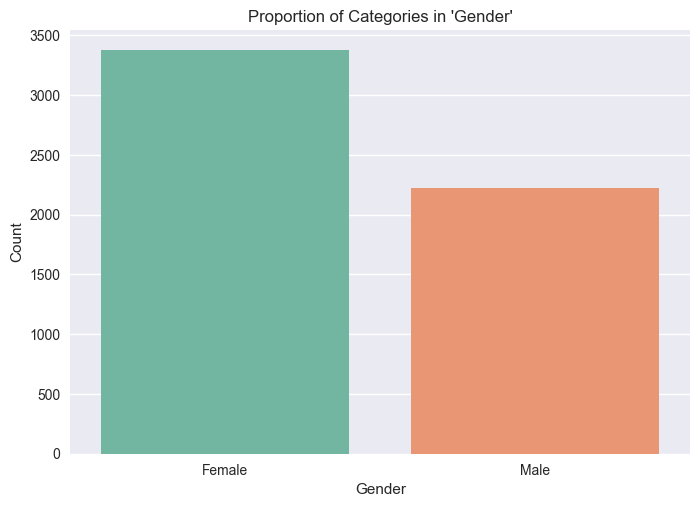

Category Counts and Proportions for 'CampaignChannel':
                 Count  Proportion (%)
CampaignChannel                       
Referral          1204       21.500000
PPC               1157       20.660714
Email             1093       19.517857
Social Media      1080       19.285714
SEO               1066       19.035714




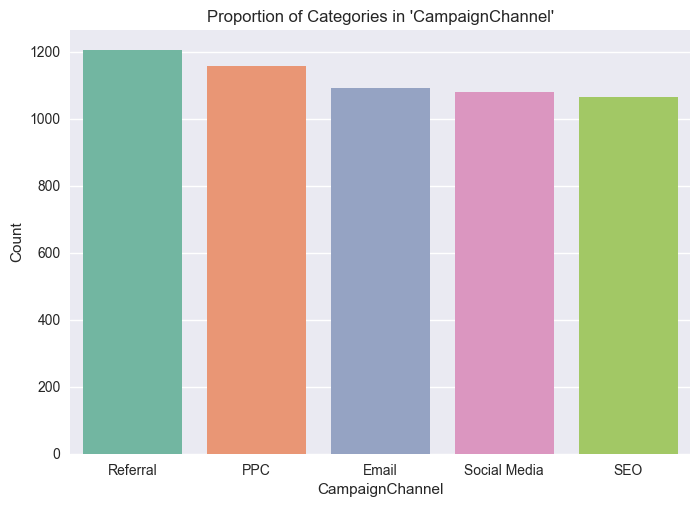

Category Counts and Proportions for 'CampaignType':
               Count  Proportion (%)
CampaignType                        
Conversion      1456       26.000000
Awareness       1396       24.928571
Retention       1377       24.589286
Consideration   1371       24.482143




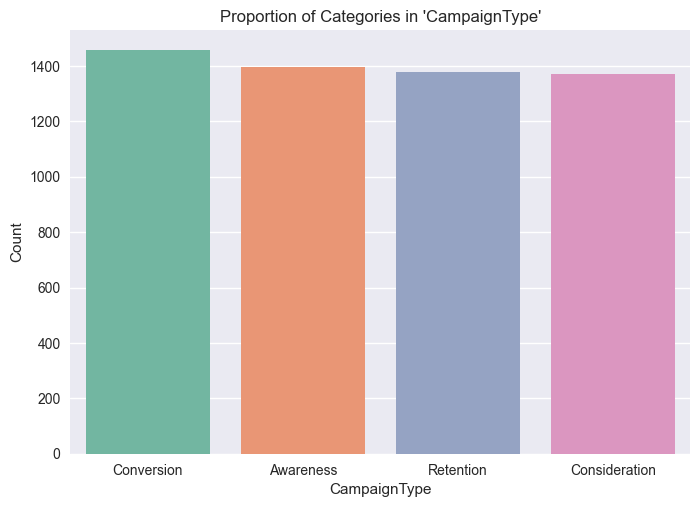

Category Counts and Proportions for 'PreviousPurchases':
                   Count  Proportion (%)
PreviousPurchases                       
9                    579       10.339286
6                    579       10.339286
0                    577       10.303571
3                    575       10.267857
8                    568       10.142857
1                    566       10.107143
4                    548        9.785714
5                    548        9.785714
2                    536        9.571429
7                    524        9.357143




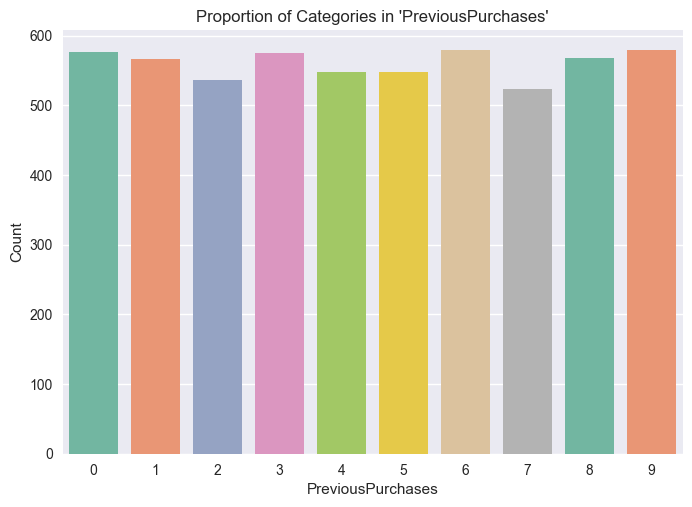

Category Counts and Proportions for 'Conversion':
            Count  Proportion (%)
Conversion                       
1            4908       87.642857
0             692       12.357143




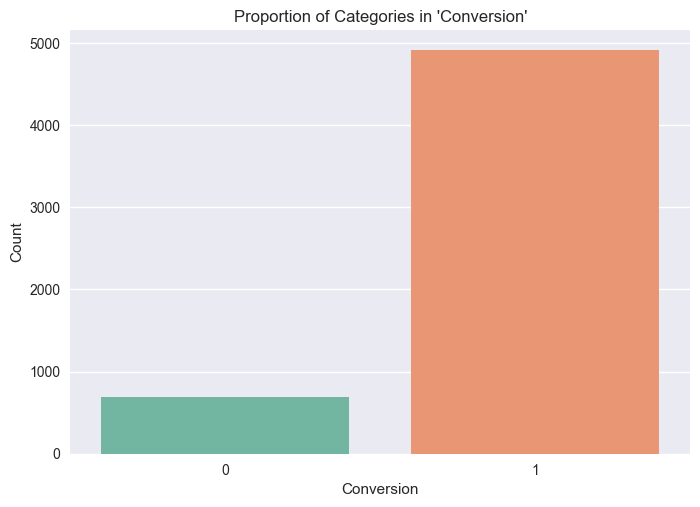

Category Counts and Proportions for 'returning_customer':
                    Count  Proportion (%)
returning_customer                       
1                    5023       89.696429
0                     577       10.303571




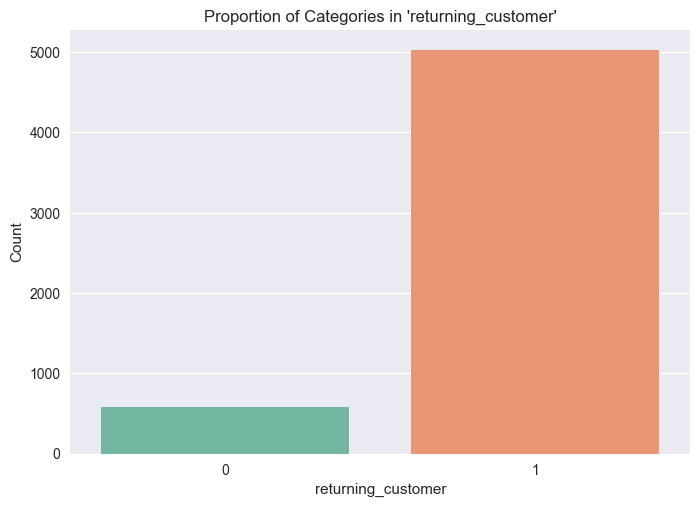

In [166]:
# Now I will call the function on each variable
categorical_columns = ['Gender', 'CampaignChannel', 'CampaignType', 'PreviousPurchases', 'Conversion', 'returning_customer']

for column in categorical_columns:
    describe_categorical(train_data, column)

I see there is a higher proportion of male to female than in the general population. The rest of the variables are balanced by category. 

In [167]:
# Function to explore continuous variables
def describe_continuous(data, column_name):
    """
    Displays descriptive statistics and a boxplot for a continuous variable.

    Parameters:
    - data: Pandas DataFrame containing the data
    - column_name: Name of the continuous column to explore
    """
    # Calculate descriptive statistics
    stats = {
        "Min": data[column_name].min(),
        "Max": data[column_name].max(),
        "Mean": data[column_name].mean(),
        "Median": data[column_name].median()
    }

    # Print descriptive statistics
    print(f"Descriptive Statistics for '{column_name}':")
    for stat, value in stats.items():
        print(f"{stat}: {value}")
    print("\n")

    # Plot a boxplot
    sns.boxplot(x=data[column_name], color="skyblue")
    plt.title(f"Boxplot of '{column_name}'")
    plt.xlabel(column_name)
    plt.show()

    # Plot a histogram
    plt.figure(figsize=(10, 4))
    sns.histplot(data[column_name], kde=True, color="steelblue", bins=20)
    plt.title(f"Histogram of '{column_name}'")
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.show()

Descriptive Statistics for 'Age':
Min: 18
Max: 69
Mean: 43.62583333333333
Median: 43.0




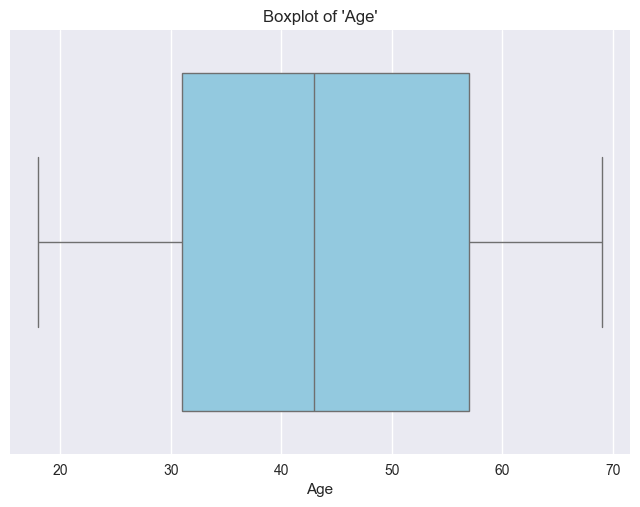

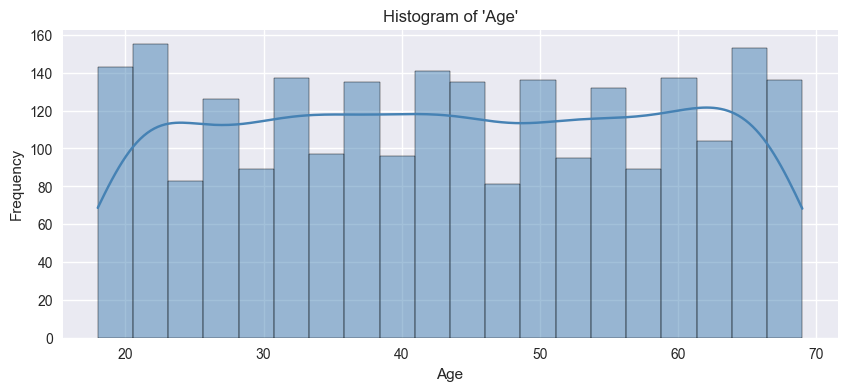

Descriptive Statistics for 'Income':
Min: 20029
Max: 149986
Mean: 84772.3275
Median: 85462.0




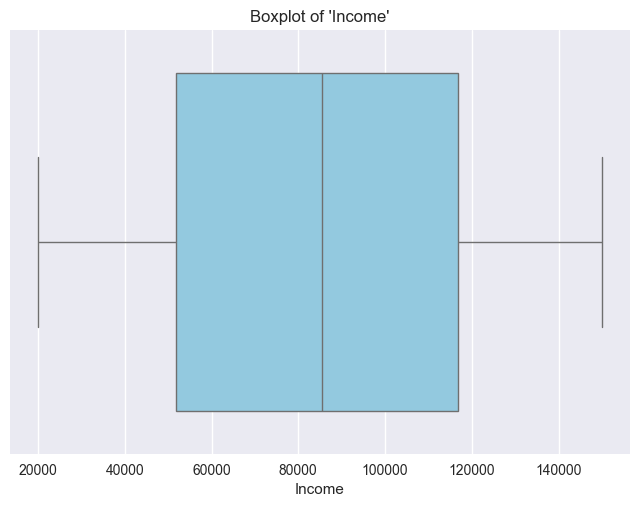

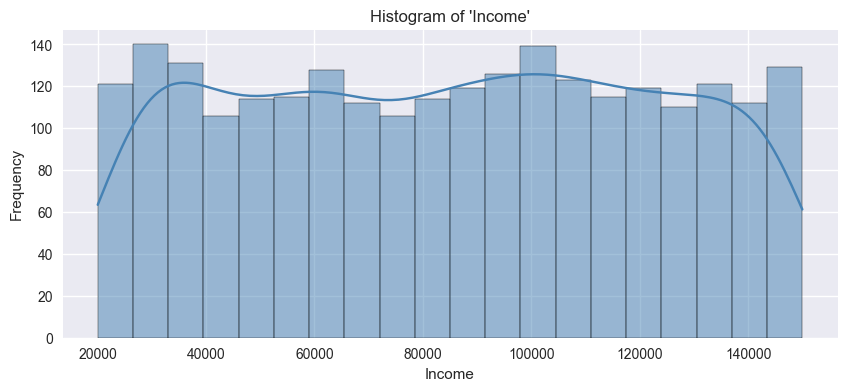

Descriptive Statistics for 'LoyaltyPoints':
Min: 0
Max: 4999
Mean: 2500.5245833333333
Median: 2482.0




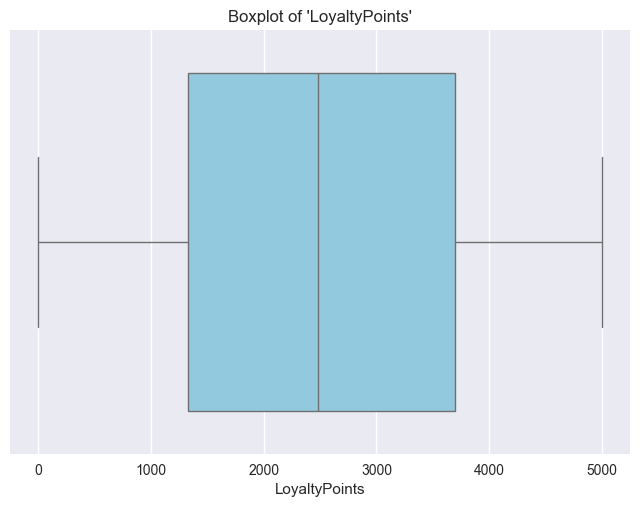

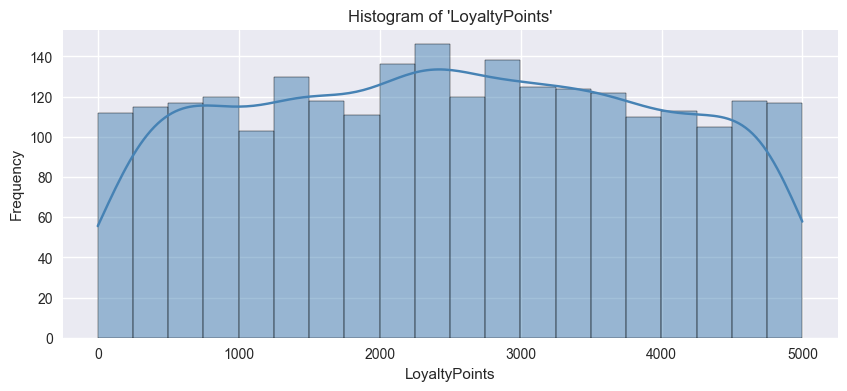

Descriptive Statistics for 'AdSpend':
Min: 100.05481308980612
Max: 9996.986532612127
Mean: 5024.519538607089
Median: 5092.244478756247




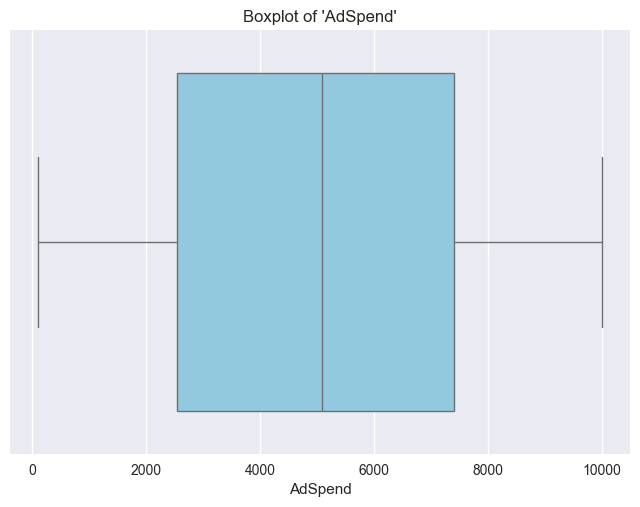

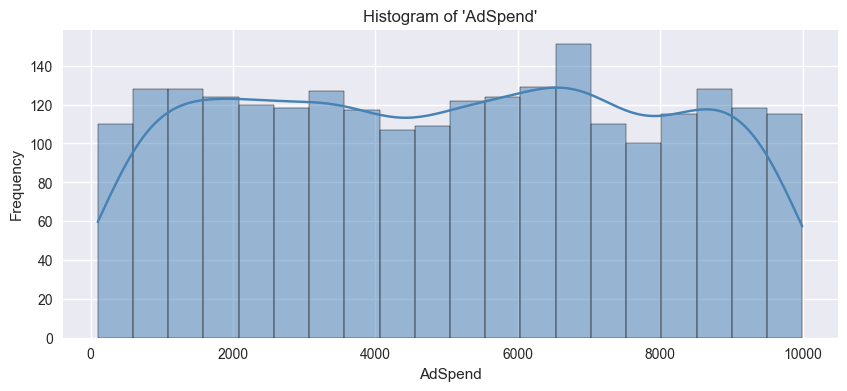

In [168]:
# Now I will call the function on each variable
quantitative_columns = ['Age', 'Income', 'LoyaltyPoints', 'AdSpend']

for column in quantitative_columns:
    describe_continuous(test_data, column)

The continuous variables tend to show a uniform distribution. Since the scales are quite different specially for income, it may be worthwile to standarize them. Now I will analyze the relation between the candidate variables and the target variable. 

In [169]:
# Functions to check association between the categorical variables and the target variable. 
def association_categorical(train_fold, column_name, target_name="target"):
    """
    Analyze a categorical variable by plotting its distribution against the
    the proportion of target=1.

    Parameters:
    - train_fold: Pandas DataFrame containing the training data for the fold.
    - column_name: Name of the categorical column to analyze.
    - target_name: Name of the target column (default is 'target' for simplicity).
    """
    # Calculate the proportion of target=1 for each category
    category_summary = train_fold.groupby(column_name)[target_name].mean()

    # Count the occurrences of each category
    counts = train_fold[column_name].value_counts()

    # Create a bar plot
    plt.figure(figsize=(8, 5))
    sns.barplot(x=counts.index, y=counts.values, palette="Set2", hue=counts.index)
    plt.title(f"Distribution of '{column_name}' with Target=1 Proportion")
    plt.xlabel(column_name)
    plt.ylabel("Count")

    # Add labels for the proportion of target=1
    for i, category in enumerate(counts.index):
        proportion = category_summary.get(category, 0)
        plt.text(i, counts[category], f"{proportion:.2f}", ha="center", va="bottom", fontsize=10)

    plt.show()


In [170]:
# Functions to check correlation between the continuous variables and the target variable. 
def association_continuous(train_fold, column_name, target_name="target"):
    """
    Analyze a continuous variable by calculating its correlation with the target
    and plotting a scatter plot with a regression line.

    Parameters:
    - train_fold: Pandas DataFrame containing the training data for the fold.
    - column_name: Name of the continuous column to analyze.
    - target_name: Name of the target column (default is 'target' for simplicity).
    """
    # Calculate the correlation with the target
    correlation = train_fold[[column_name, target_name]].corr().iloc[0, 1]

    # Print the correlation
    print(f"Correlation between '{column_name}' and '{target_name}': {correlation:.2f}")

    # Create a scatter plot with a regression line
    plt.figure(figsize=(8, 5))
    sns.regplot(x=column_name, y=target_name, data=train_fold, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
    plt.title(f"Scatter Plot of '{column_name}' vs '{target_name}'")
    plt.xlabel(column_name)
    plt.ylabel(target_name)
    plt.show()

Analyzing categorical variable: Gender


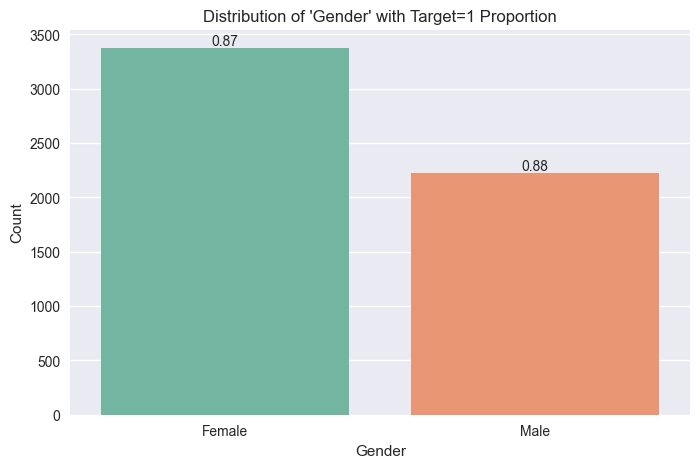

Analyzing categorical variable: CampaignChannel


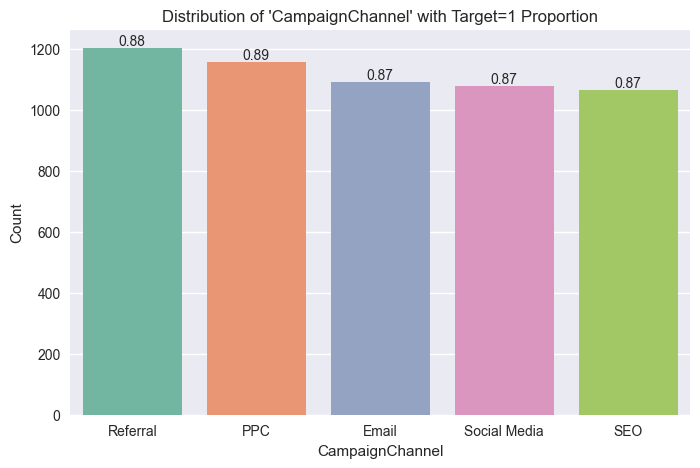

Analyzing categorical variable: CampaignType


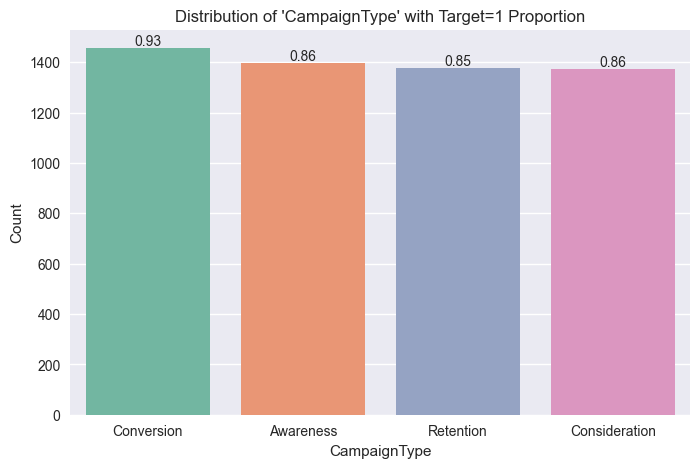

Analyzing categorical variable: PreviousPurchases


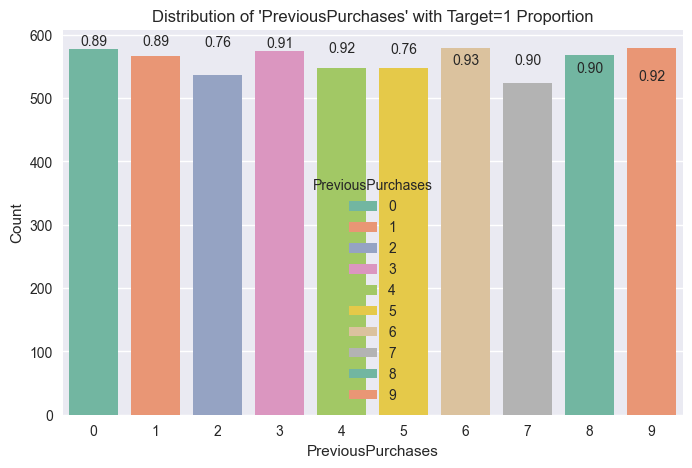

Analyzing categorical variable: Conversion


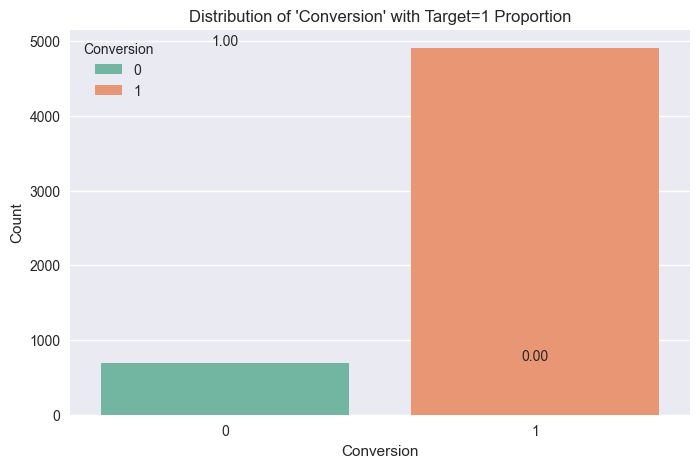

Analyzing categorical variable: returning_customer


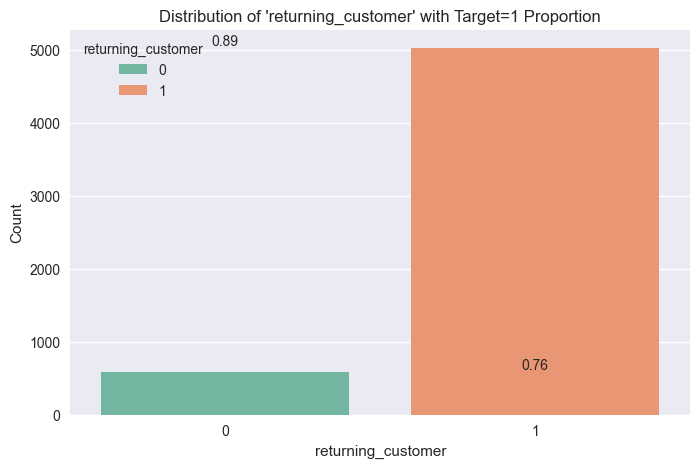

Analyzing continuous variable: Age
Correlation between 'Age' and 'Conversion': -0.01


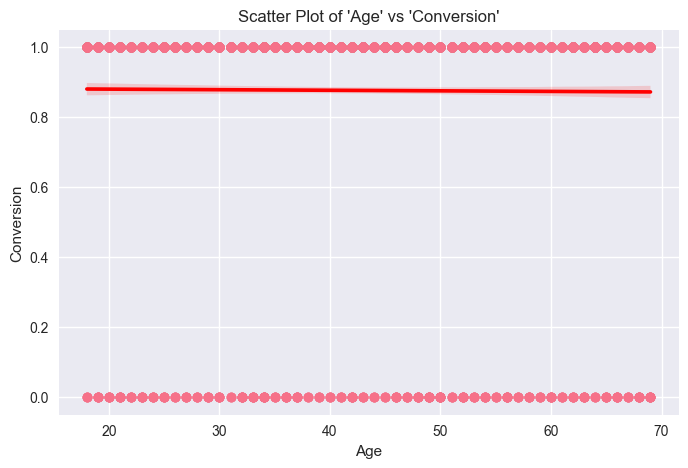

Analyzing continuous variable: Income
Correlation between 'Income' and 'Conversion': 0.02


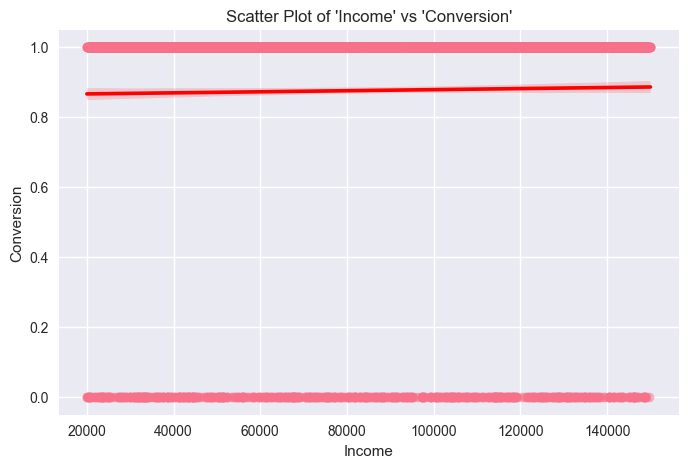

Analyzing continuous variable: LoyaltyPoints
Correlation between 'LoyaltyPoints' and 'Conversion': 0.10


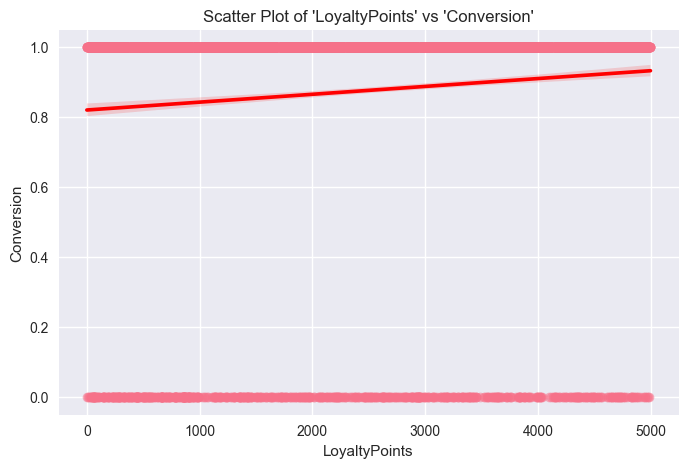

Analyzing continuous variable: AdSpend
Correlation between 'AdSpend' and 'Conversion': 0.12


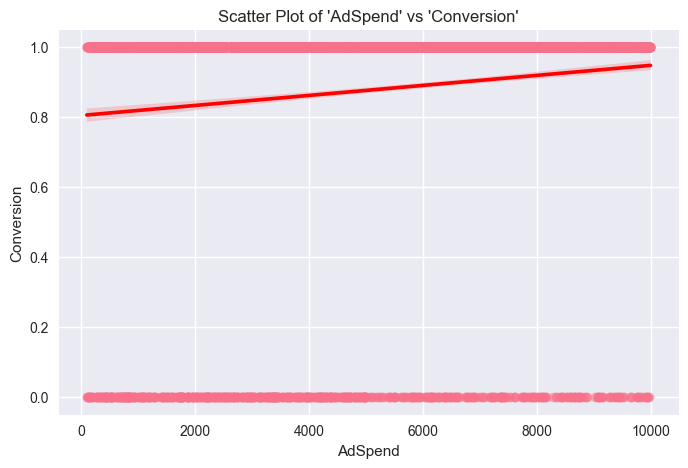

In [171]:
### Execute the analysis on the train data. 

# Analyze categorical variables
for column in categorical_columns:
    print(f"Analyzing categorical variable: {column}")
    association_categorical(train_data, column, target_name='Conversion')
    
# Analyze continuous variables
for column in quantitative_columns:
    print(f"Analyzing continuous variable: {column}")
    association_continuous(train_data, column,  target_name='Conversion')
    

# Correlations with target 
Age: Negative correlation suggesting that the product or service is more attractive to younger individuals. Hence this could be a good predictor
Gender: Slightly lower conversion from female vs male
Income: Positive correlation, the higher the income the higher the conversion 
LoyaltyPoints: Positive correlation, more loyalty points are related to higher conversion 
AdSpend:  Positive correlation, higher add spend is related to higher conversion
Campaing channel: Some campaign channels are associated to higher conversion, mainly PPC and Referral. Here I do think using full one hot encoding 
is worth while since it is one of the main mechanisms the business has to achieve conversion 
CampaignType: Conversion has the highest rate, not surprisingly vs the other campaing types which seem to be around the same conversion. 
PreviousPurchases & returning_customer: much higher conversion on new customers vs returning. not clearly linked to the number of previous purchases in 
some ordered way. I will only keep the returning customer variable for analysis. 




Now we should check the correlation between features to identify any multicolinearity or other redundancies. 

In [172]:

### First I have some functions to analyze the associations. for continous variables I will use pair plots. Same will be done for continous and discrete variables 
 

def plot_pairplot(data, continuous_columns, discrete_col=None):
    """
    Plots a pairplot for continuous variables, optionally grouped by a discrete variable.

    Parameters:
    - data: DataFrame containing the data.
    - continuous_columns: List of continuous variable names.
    - discrete_col: Name of the discrete variable to use as the hue (optional).
    """
    if discrete_col:
        # Pairplot with hue for grouping by the discrete variable
        sns.pairplot(data, vars=continuous_columns, hue=discrete_col, palette="Set2", diag_kind="kde", corner=True)
        plt.suptitle(f"Pairplot of Continuous Variables Grouped by {discrete_col}", y=1.02)
    else:
        # Pairplot without hue (continuous vs continuous only)
        sns.pairplot(data, vars=continuous_columns, diag_kind="kde", corner=True)
        plt.suptitle("Pairplot of Continuous Variables", y=1.02)
    plt.show()


### For discrete variables I will use contingency tables.

def contingency_table(data, col1, col2):
    """
    Displays a contingency table for two categorical variables.

    Parameters:
    - data: DataFrame containing the data.
    - col1: First categorical variable.
    - col2: Second categorical variable.
    """
    contingency_table = pd.crosstab(data[col1], data[col2])
    print(f"Contingency Table for {col1} and {col2}:\n")
    print(contingency_table)
    print("\n")




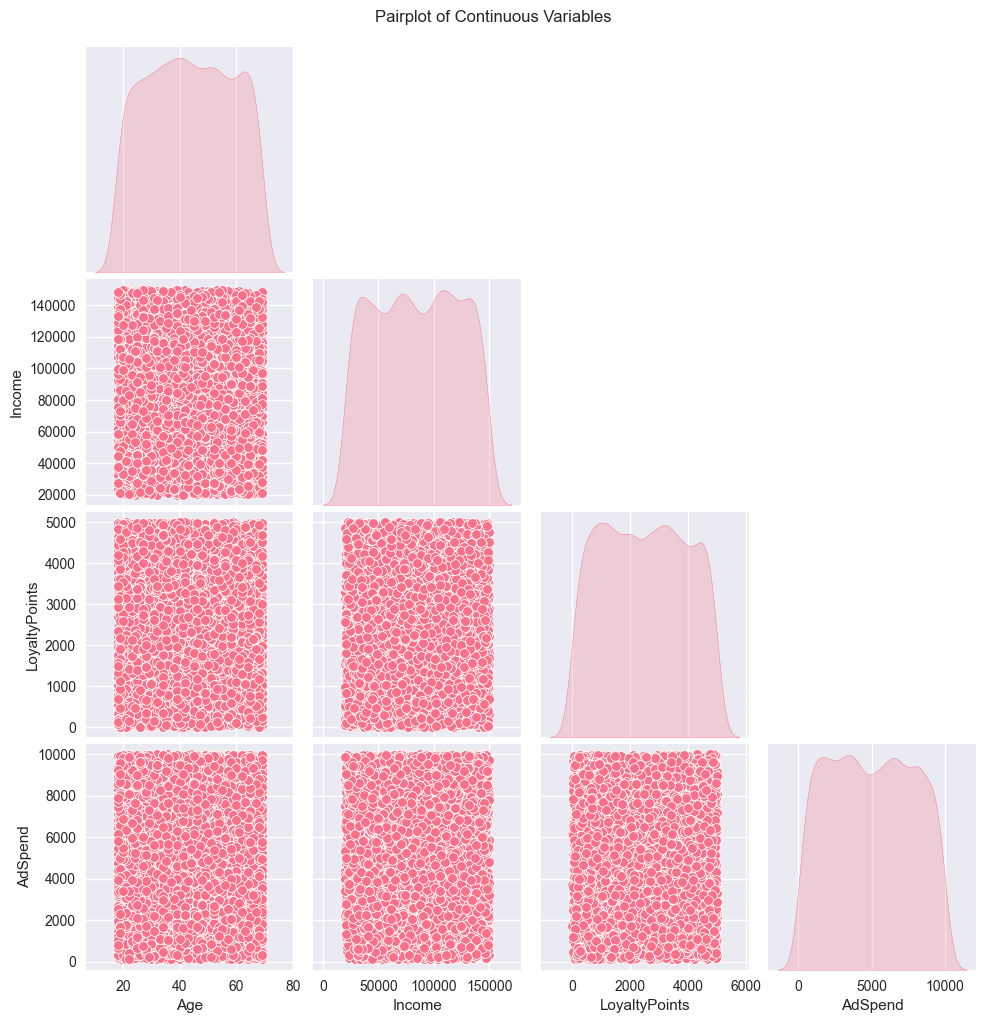

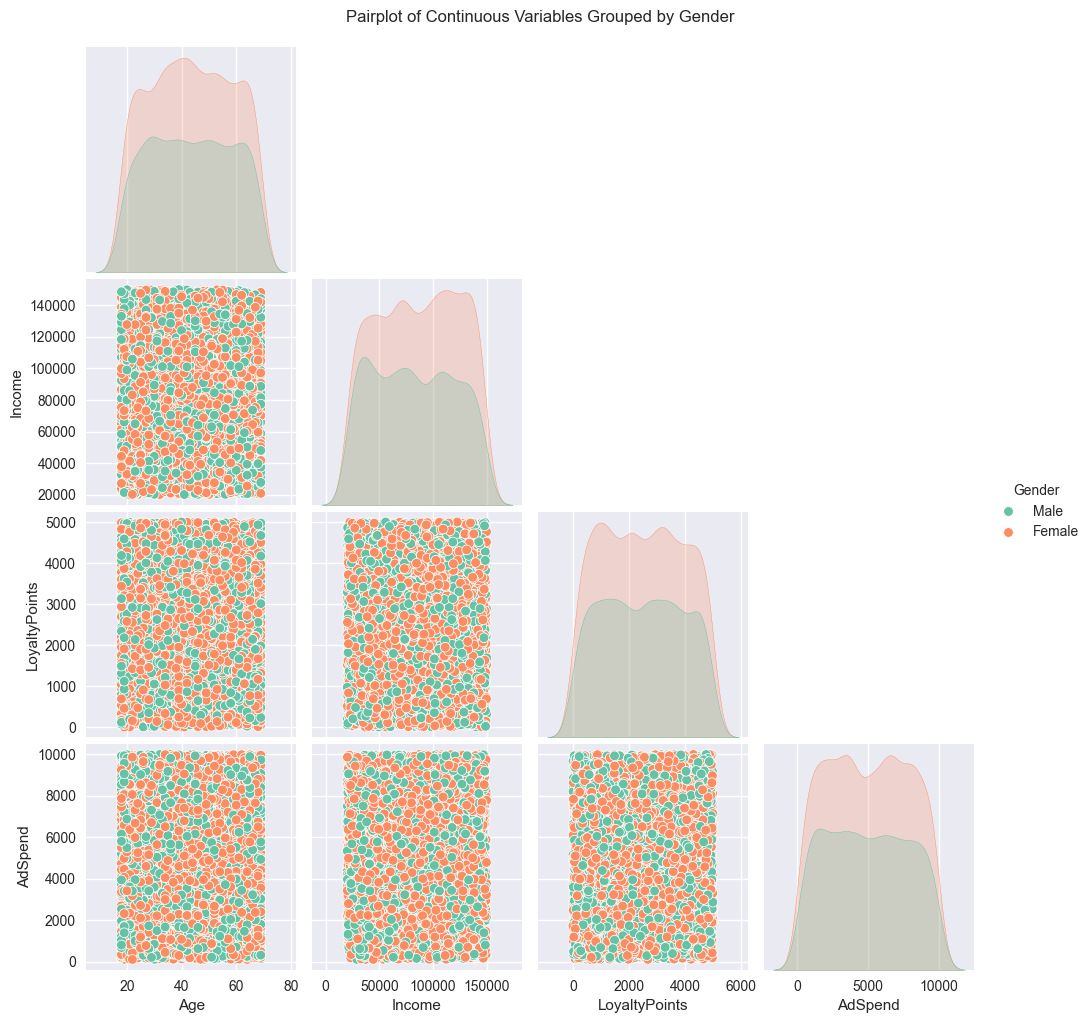

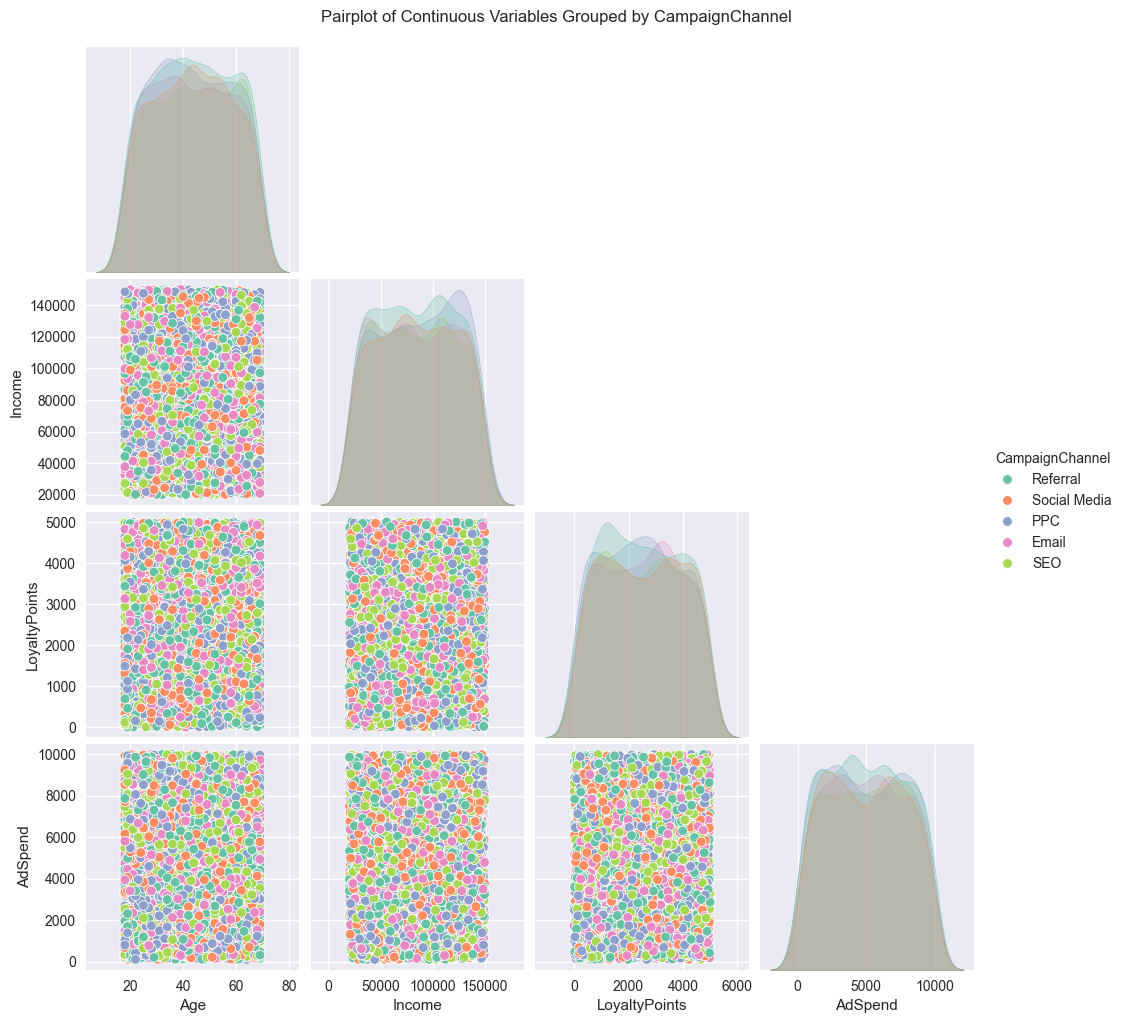

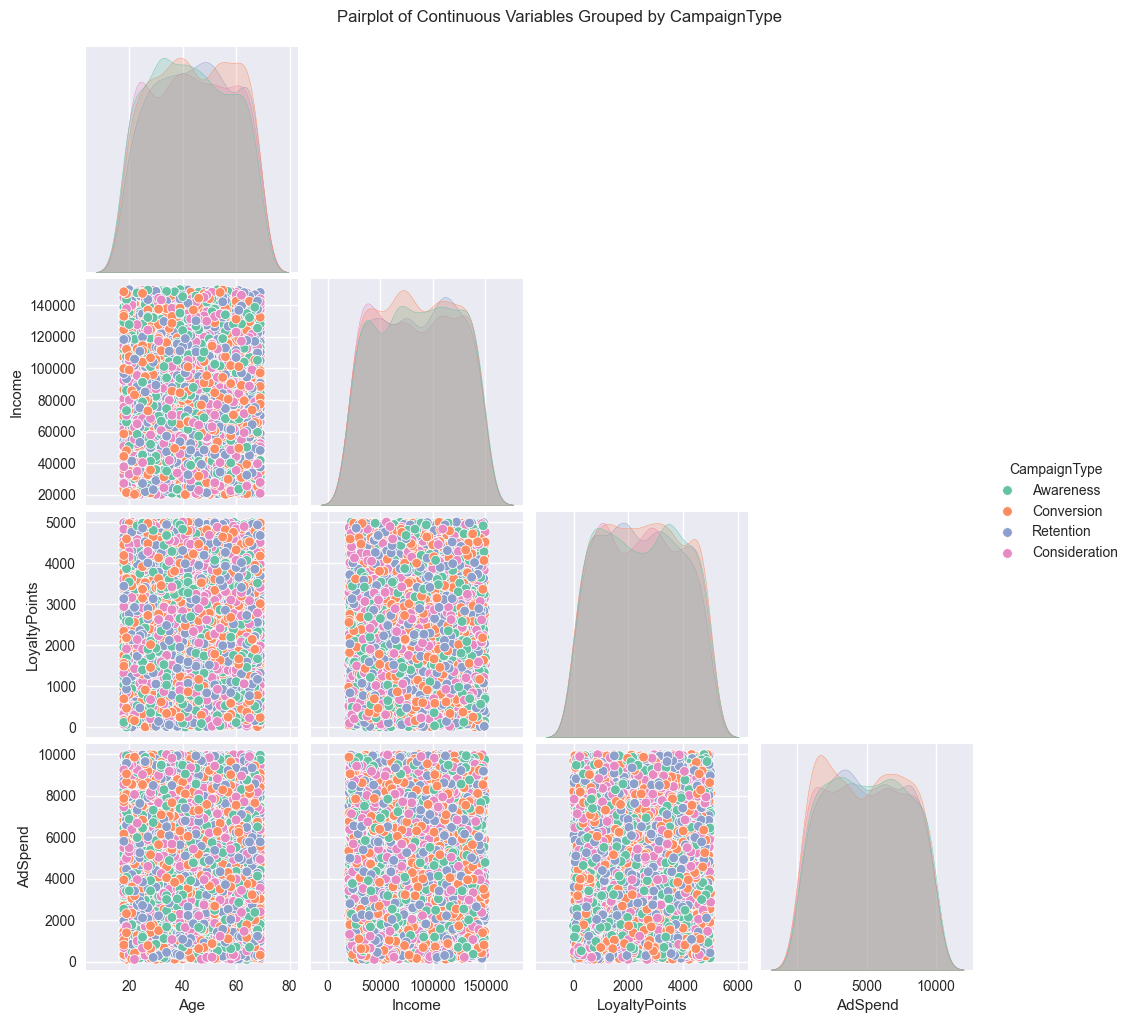

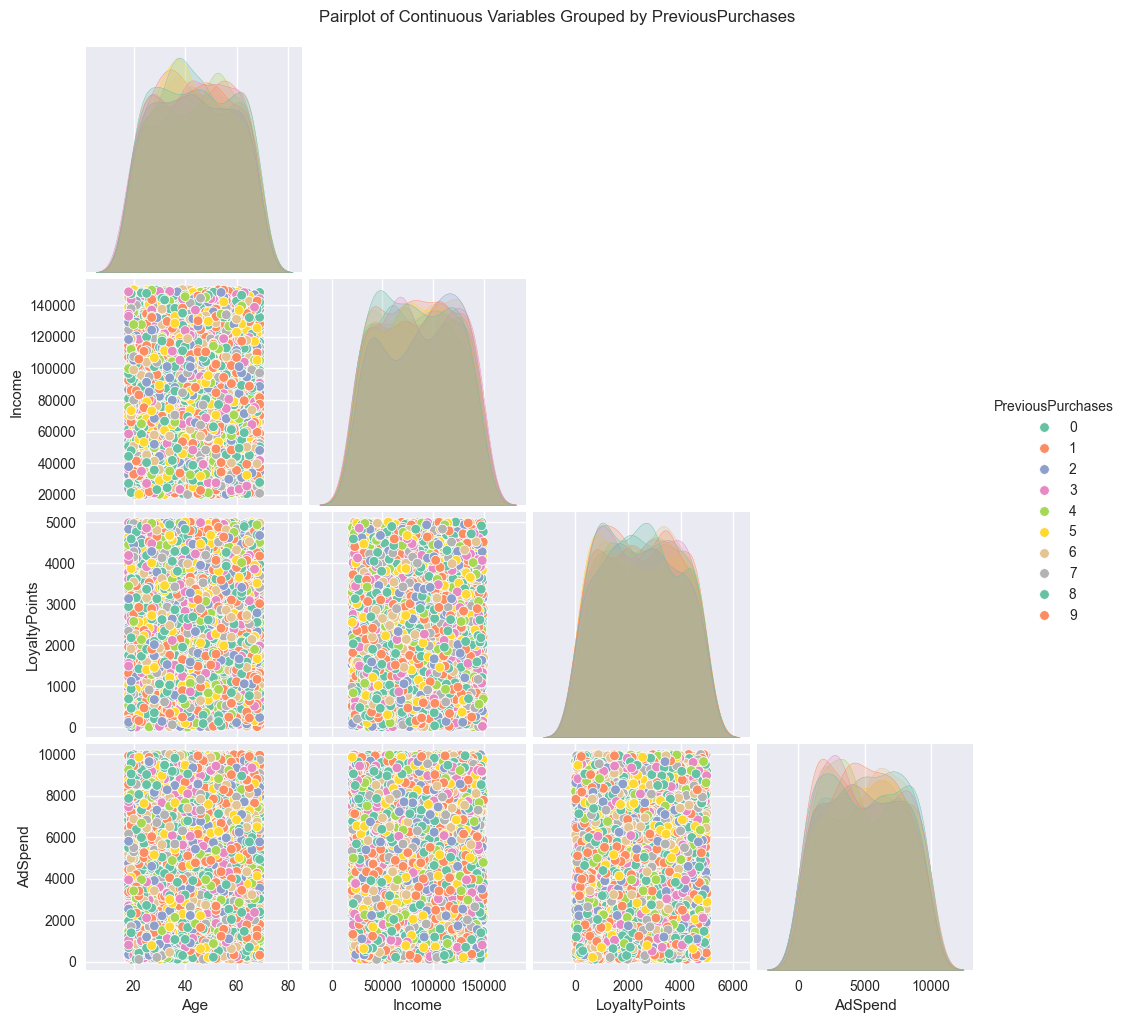

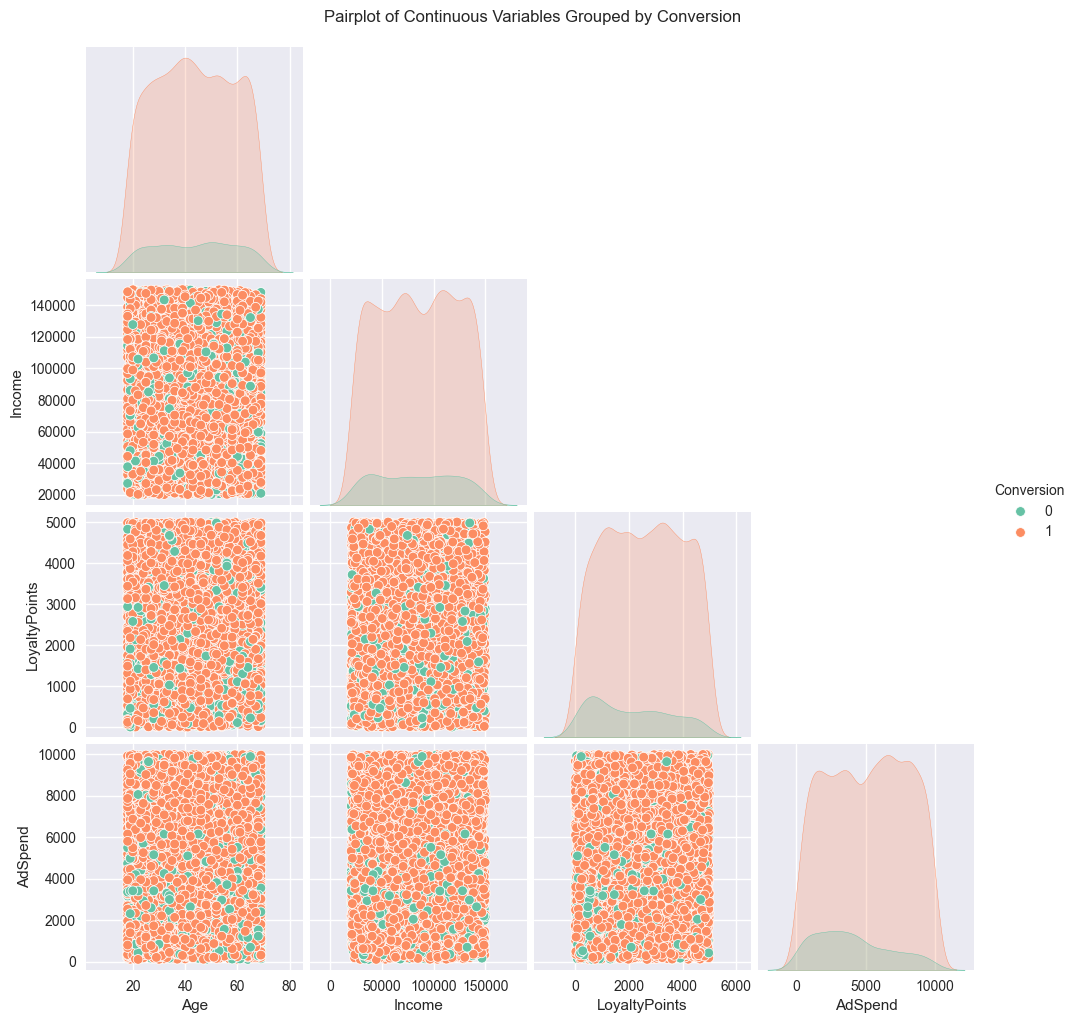

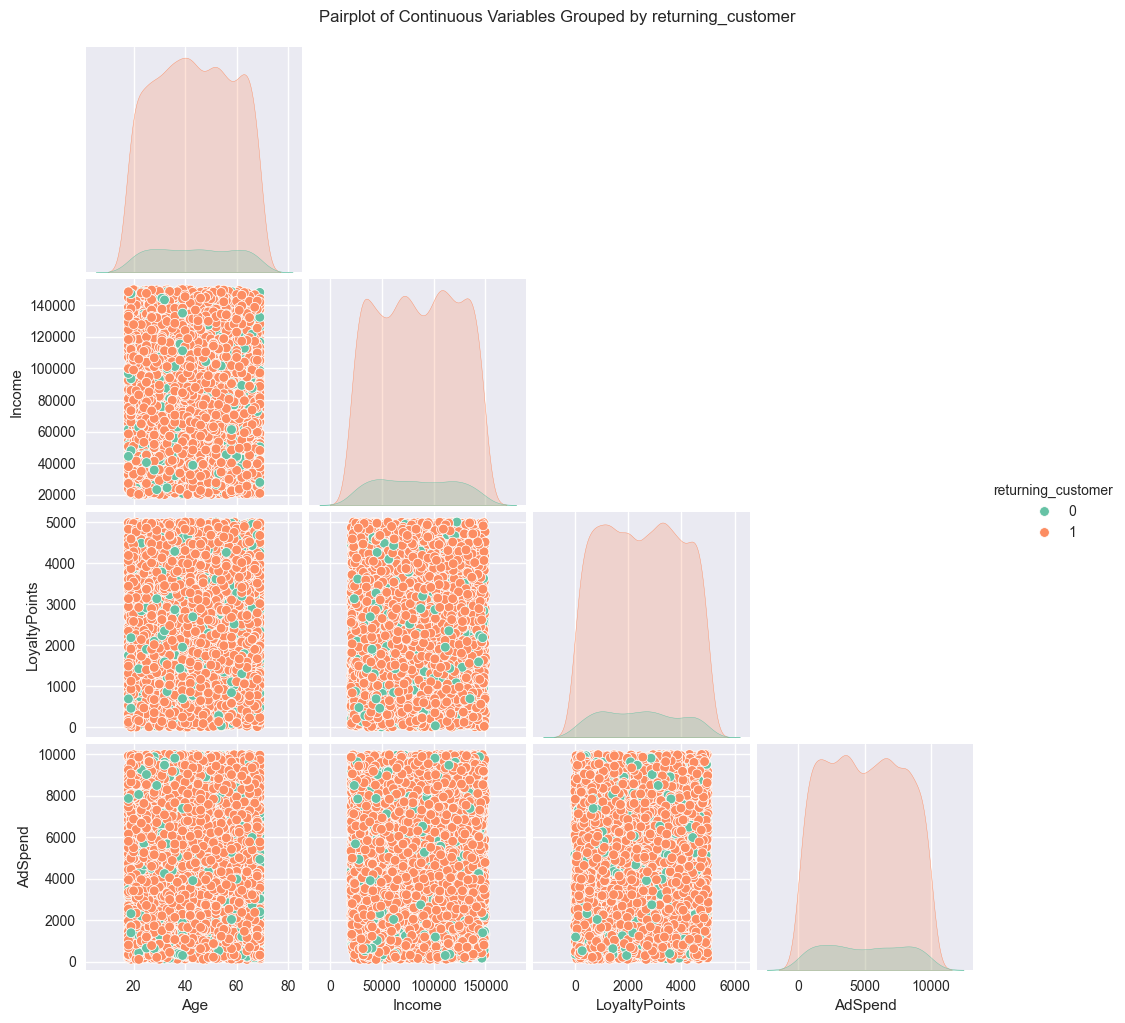

In [173]:

# Pairplot for continuous variables
plot_pairplot(train_data, quantitative_columns)
    
# Pairplot for continuous variables grouped by discrete variables
for discrete_col in categorical_columns:
    plot_pairplot(train_data, quantitative_columns, discrete_col=discrete_col)
    

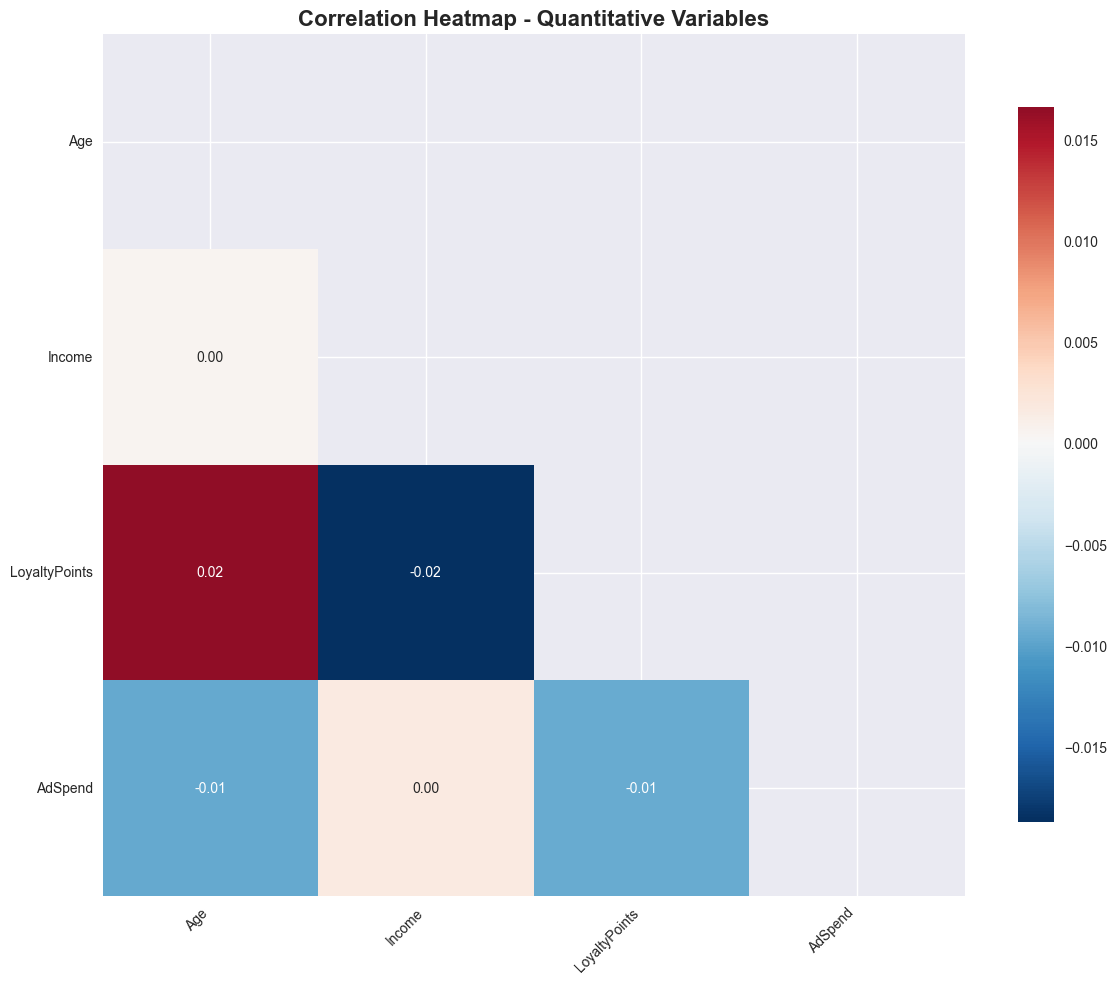

In [174]:
# Create correlation heatmap for quantitative variables
quantitative_data = train_data[quantitative_columns]

# Calculate correlation matrix
correlation_matrix = quantitative_data.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle to avoid duplication

# Create heatmap
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True,           # Show correlation values
            cmap='RdBu_r',        # Red-Blue colormap (red=positive, blue=negative)
            center=0,             # Center colormap at 0
            square=True,          # Square cells
            fmt='.2f',            # Format to 2 decimal places
            cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap - Quantitative Variables', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [175]:
print("Contingency Tables for Categorical Variables:")
for i, col1 in enumerate(categorical_columns):
    for col2 in categorical_columns[i+1:]:
        contingency_table(train_data, col1, col2)

Contingency Tables for Categorical Variables:
Contingency Table for Gender and CampaignChannel:

CampaignChannel  Email  PPC  Referral  SEO  Social Media
Gender                                                  
Female             679  711       727  633           624
Male               414  446       477  433           456


Contingency Table for Gender and CampaignType:

CampaignType  Awareness  Consideration  Conversion  Retention
Gender                                                       
Female              855            811         891        817
Male                541            560         565        560


Contingency Table for Gender and PreviousPurchases:

PreviousPurchases    0    1    2    3    4    5    6    7    8    9
Gender                                                             
Female             348  349  333  334  337  312  352  325  339  345
Male               229  217  203  241  211  236  227  199  229  234


Contingency Table for Gender and Conversion:

Co

No important correlations between the quantitative variables were identified. No concerns over multicolinearity. Ad spending does seem to covary somewhat with campaign type and channel.  

# Feature Engineering: One-Hot Encoding and Interactions

Now we move into feature engineering and building our predictive models, starting with a baseline logistic regression and then developing our main XGBoost model.

In [176]:
# Feature Engineering 

# Define features to keep 
features_to_keep = ['Age', 'Income', 'LoyaltyPoints', 'AdSpend', 'Gender', 'returning_customer']

# Define features to one-hot encode
features_to_encode = ['CampaignChannel', 'CampaignType']

def engineer_features(data, feature_prefix=""):
    """Engineer features"""
    
    # Start with features to keep 
    engineered_data = data[features_to_keep].copy()
    
    # One-hot encode CampaignChannel
    channel_dummies = pd.get_dummies(data['CampaignChannel'], prefix='CampaignChannel')
    engineered_data = pd.concat([engineered_data, channel_dummies], axis=1)
    
    # One-hot encode CampaignType  
    type_dummies = pd.get_dummies(data['CampaignType'], prefix='CampaignType')
    engineered_data = pd.concat([engineered_data, type_dummies], axis=1)
    
    # Create interaction features
    print("Creating interaction features...")
    campaign_type_cols = [col for col in engineered_data.columns if col.startswith('CampaignType_')]
    campaign_channel_cols = [col for col in engineered_data.columns if col.startswith('CampaignChannel_')]
    
    interaction_count = 0
    for type_col in campaign_type_cols:
        for channel_col in campaign_channel_cols:
            interaction_name = f"{type_col}_x_{channel_col}"
            engineered_data[interaction_name] = engineered_data[type_col] * engineered_data[channel_col]
            interaction_count += 1
        
    return engineered_data

# Engineer features for both datasets
X_train_engineered = engineer_features(train_data, "training set")
X_test_engineered = engineer_features(test_data, "test set")


# Count different types of features
original_features = len(features_to_keep)
channel_features = len([col for col in X_train_engineered.columns if col.startswith('CampaignChannel_')])
type_features = len([col for col in X_train_engineered.columns if col.startswith('CampaignType_')])
interaction_features = len([col for col in X_train_engineered.columns if '_x_CampaignChannel_' in col])

print(f"\nFeature breakdown:")
print(f"• Original features (kept as-is): {original_features}")
print(f"• CampaignChannel one-hot encoded: {channel_features}")
print(f"• CampaignType one-hot encoded: {type_features}")
print(f"• Interaction features: {interaction_features}")
print(f"• Total features: {X_train_engineered.shape[1]}")

# Data quality check
print(f" Data Quality Check:")
print(f"Training set missing values: {X_train_engineered.isnull().sum().sum()}")
print(f"Test set missing values: {X_test_engineered.isnull().sum().sum()}")


Creating interaction features...
Creating interaction features...

Feature breakdown:
• Original features (kept as-is): 6
• CampaignChannel one-hot encoded: 5
• CampaignType one-hot encoded: 24
• Interaction features: 20
• Total features: 35
 Data Quality Check:
Training set missing values: 0
Test set missing values: 0


In [177]:
#Before we proceed with the modeling, I will ensure that the Gender variable is properly encoded.
X_train_engineered['Gender'] = X_train_engineered['Gender'].map({'Female': 0, 'Male': 1})
X_test_engineered['Gender'] = X_test_engineered['Gender'].map({'Female': 0, 'Male': 1})

## Model Development

I decided to start with a baseline logistic regression model and then develop an alternative XGBoost model.

### Baseline Model: Logistic Regression 

In [178]:
# Baseline Logistic Regression Model (No Scaling)
def train_baseline_model(X_train, y_train, X_test, y_test):
    """
    Train and evaluate baseline logistic regression model without any scaling
    """
    
    # Train logistic regression with class balancing (no scaling needed)
    log_reg = LogisticRegression(
        random_state=1001,
        class_weight='balanced',  # Try to handle class imbalance
        max_iter=1000
    )
    
    log_reg.fit(X_train, y_train)
    
    # Predictions
    y_pred_train = log_reg.predict(X_train)
    y_pred_test = log_reg.predict(X_test)
    y_pred_proba_train = log_reg.predict_proba(X_train)[:, 1]
    y_pred_proba_test = log_reg.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_proba_test)
    
    # Store results
    results = {
        'model': 'Logistic Regression',
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'precision': test_precision,
        'recall': test_recall,
        'f1': test_f1,
        'auc': test_auc
    }
    
    print(f" Baseline Model Results:")
    print(f"   Train Accuracy: {train_accuracy:.3f}")
    print(f"   Test Accuracy:  {test_accuracy:.3f}")
    print(f"   AUC:           {test_auc:.3f}")
    print(f"   Precision:     {test_precision:.3f}")
    print(f"   Recall:        {test_recall:.3f}")
    print(f"   F1-Score:      {test_f1:.3f}")
    
    return log_reg, results, y_pred_proba_test


baseline_model, baseline_results, baseline_proba = train_baseline_model(
    X_train_engineered, y_train, X_test_engineered, y_test
)

 Baseline Model Results:
   Train Accuracy: 0.633
   Test Accuracy:  0.634
   AUC:           0.655
   Precision:     0.917
   Recall:        0.640
   F1-Score:      0.754


In [179]:
# XGBoost Model with Class Imbalance Handling
def train_xgboost_model(X_train, y_train, X_test, y_test):
    """
    Train and evaluate XGBoost model with proper class imbalance handling
    """
    # Calculate class distribution for scale_pos_weight
    neg_count = (y_train == 0).sum()  # Non-conversions
    pos_count = (y_train == 1).sum()  # Conversions
    scale_pos_weight = neg_count / pos_count

    # Train XGBoost with optimized parameters for imbalanced data
    xgb_model = xgb.XGBClassifier(
        # Class imbalance handling
        scale_pos_weight=scale_pos_weight,
        
        # Model parameters
        n_estimators=200,           
        max_depth=6,                
        learning_rate=0.1,          
        subsample=0.8,              
        colsample_bytree=0.8,      
        
        # Regularization
        reg_alpha=0.1,              
        reg_lambda=1.0,             
        
        # Other parameters
        random_state=1001,
        eval_metric='auc',          # Focus on AUC as the data is imbalanced and we want good discrimination
        n_jobs=-1,                  
        verbosity=0                 
    )
    
    
    # Fit the model
    xgb_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = xgb_model.predict(X_train)
    y_pred_test = xgb_model.predict(X_test)
    y_pred_proba_train = xgb_model.predict_proba(X_train)[:, 1]
    y_pred_proba_test = xgb_model.predict_proba(X_test)[:, 1]
    
    # Calculate comprehensive metrics
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_proba_test)
    
    # Calculate class-specific metrics
    cm = confusion_matrix(y_test, y_pred_test)
    tn, fp, fn, tp = cm.ravel()
    
    # Class-specific recalls
    class_0_recall = tn / (tn + fp) if (tn + fp) > 0 else 0  # Recall for non-conversions
    class_1_recall = tp / (tp + fn) if (tp + fn) > 0 else 0  # Recall for conversions
    
    # Macro averages (equal weight to both classes)
    macro_precision = precision_score(y_test, y_pred_test, average='macro')
    macro_recall = recall_score(y_test, y_pred_test, average='macro')
    macro_f1 = f1_score(y_test, y_pred_test, average='macro')
    
    # Store results
    results = {
        'model': 'XGBoost (Class Balanced)',
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'precision': test_precision,
        'recall': test_recall,
        'f1': test_f1,
        'auc': test_auc,
        'macro_precision': macro_precision,
        'macro_recall': macro_recall,
        'macro_f1': macro_f1,
        'class_0_recall': class_0_recall,
        'class_1_recall': class_1_recall
    }
    
    print(f" XGBoost Model Results:")
    print(f"   Train Accuracy: {train_accuracy:.3f}")
    print(f"   Test Accuracy:  {test_accuracy:.3f}")
    print(f"   AUC:           {test_auc:.3f}")
    print(f"   Precision:     {test_precision:.3f}")
    print(f"   Recall:        {test_recall:.3f}")
    print(f"   F1-Score:      {test_f1:.3f}")
    
    print(f" Class-Specific Performance:")
    print(f"   Class 0 Recall (Non-conversion): {class_0_recall:.3f}")
    print(f"   Class 1 Recall (Conversion):     {class_1_recall:.3f}")
    print(f"   Macro Precision: {macro_precision:.3f}")
    print(f"   Macro Recall:    {macro_recall:.3f}")
    print(f"   Macro F1-Score:  {macro_f1:.3f}")
    
    print(f" Detailed Confusion Matrix:")
    print(f"   True Negatives (correctly predicted no conversion): {tn}")
    print(f"   False Positives (incorrectly predicted conversion): {fp}")
    print(f"   False Negatives (missed conversions): {fn}")
    print(f"   True Positives (correctly predicted conversion): {tp}")
    
    # Feature importance analysis
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': xgb_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f" Top 10 Most Important Features:")
    for i, (_, row) in enumerate(feature_importance.head(10).iterrows()):
        print(f"   {i+1:2d}. {row['feature']:<25} {row['importance']:.4f}")
    
    return xgb_model, results, y_pred_proba_test, feature_importance

# Train XGBoost model
xgb_model, xgb_results, xgb_proba, xgb_feature_importance = train_xgboost_model(
    X_train_engineered, y_train, X_test_engineered, y_test
)

 XGBoost Model Results:
   Train Accuracy: 0.905
   Test Accuracy:  0.765
   AUC:           0.625
   Precision:     0.900
   Recall:        0.823
   F1-Score:      0.860
 Class-Specific Performance:
   Class 0 Recall (Non-conversion): 0.351
   Class 1 Recall (Conversion):     0.823
   Macro Precision: 0.559
   Macro Recall:    0.587
   Macro F1-Score:  0.565
 Detailed Confusion Matrix:
   True Negatives (correctly predicted no conversion): 104
   False Positives (incorrectly predicted conversion): 192
   False Negatives (missed conversions): 372
   True Positives (correctly predicted conversion): 1732
 Top 10 Most Important Features:
    1. CampaignType_Conversion   0.0746
    2. returning_customer        0.0658
    3. CampaignType_Conversion_x_CampaignChannel_PPC 0.0358
    4. CampaignType_Retention_x_CampaignChannel_SEO 0.0352
    5. CampaignType_Awareness_x_CampaignChannel_Email 0.0331
    6. CampaignType_Awareness_x_CampaignChannel_SEO 0.0319
    7. AdSpend                   0.0316

In [180]:
# XGBoost Hyperparameter Tuning with GridSearchCV
def tune_xgboost_hyperparameters(X_train, y_train, X_test, y_test, quick_tune=True):
    """
    Comprehensive hyperparameter tuning for XGBoost with class imbalance handling
    """
    # Calculate scale_pos_weight for class imbalance
    neg_count = (y_train == 0).sum()
    pos_count = (y_train == 1).sum()
    scale_pos_weight = neg_count / pos_count
    print(f"Class imbalance scale_pos_weight: {scale_pos_weight:.3f}")
    
    if quick_tune:
        print("Running QUICK hyperparameter tuning (5-10 minutes)")
        # Quick tuning - smaller parameter space
        param_grid = {
            'n_estimators': [200, 220],
            'max_depth': [2,3,4],
            'learning_rate': [.015, .018, .02, .025],
            'subsample': [0.7, 0.75, 0.8],
            'colsample_bytree': [0.65, 0.7, 0.75],
            'reg_alpha': [0.6, 0.7, 0.8],
            'reg_lambda': [2.2, 2.5, 2.8]
        }
        cv_folds = 3
    else:
        print("Running COMPREHENSIVE hyperparameter tuning (20-30 minutes)")
        # Comprehensive tuning - larger parameter space
        param_grid = {
            'n_estimators': [180, 200],
            'max_depth': [2,3],
            'learning_rate': [.015, .018, .02],
            'subsample': [0.7, 0.75, 0.8, 0.85],
            'colsample_bytree': [0.65, 0.7, 0.75, 0.8],
            'reg_alpha': [0.6, 0.7],
            'reg_lambda': [2.5, 2.8]
        }
        cv_folds = 5
    
    # Base model with fixed parameters
    base_model = xgb.XGBClassifier(
        scale_pos_weight=scale_pos_weight,
        random_state=1001,
        eval_metric='auc',
        n_jobs=-1,
        verbosity=0
    )
    
    # Setup cross-validation
    cv_strategy = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
    
    # GridSearchCV with focus on Class 0 recall (our main objective)
    start_time = time.time()
    
    grid_search = GridSearchCV(
        estimator=base_model,
        param_grid=param_grid,
        cv=cv_strategy,
        scoring='roc_auc',  # Good for imbalanced classification
        n_jobs=-1,          # Use all available cores
        verbose=1,          # Show progress
        return_train_score=True
    )
    
    # Fit the grid search
    grid_search.fit(X_train, y_train)
    
    end_time = time.time()
    tuning_time = (end_time - start_time) / 60
    
    print(f" Hyperparameter tuning completed in {tuning_time:.1f} minutes")
    
    # Get best model
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_cv_score = grid_search.best_score_
    
    print(f" BEST HYPERPARAMETERS:")
    print(f"   Cross-validation AUC: {best_cv_score:.4f}")
    for param, value in best_params.items():
        print(f"   {param}: {value}")
    
    # Evaluate on test set
    y_pred_test = best_model.predict(X_test)
    y_pred_proba_test = best_model.predict_proba(X_test)[:, 1]
    
    # Calculate comprehensive metrics
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_proba_test)
    
    # Class-specific metrics
    cm = confusion_matrix(y_test, y_pred_test)
    tn, fp, fn, tp = cm.ravel()
    class_0_recall = tn / (tn + fp) if (tn + fp) > 0 else 0
    class_1_recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    macro_f1 = f1_score(y_test, y_pred_test, average='macro')
    
    print(f" TUNED MODEL TEST PERFORMANCE:")
    print(f"   Test Accuracy:  {test_accuracy:.3f}")
    print(f"   AUC:           {test_auc:.3f}")
    print(f"   Precision:     {test_precision:.3f}")
    print(f"   Recall:        {test_recall:.3f}")
    print(f"   F1-Score:      {test_f1:.3f}")
    print(f"   Macro F1:      {macro_f1:.3f}")
    
    print(f" Class-Specific Performance:")
    print(f"   Class 0 Recall (Non-conversion): {class_0_recall:.3f}")
    print(f"   Class 1 Recall (Conversion):     {class_1_recall:.3f}")
    print(f"   True Negatives: {tn}")
    print(f"   True Positives: {tp}")
    
    # Compare with original model
    print(f" IMPROVEMENT vs ORIGINAL MODEL:")
    original_auc = xgb_results['auc']
    original_class_0_recall = xgb_results['class_0_recall']
    
    auc_improvement = test_auc - original_auc
    class_0_improvement = class_0_recall - original_class_0_recall
    
    print(f"   AUC improvement: {auc_improvement:+.3f}")
    print(f"   Class 0 Recall improvement: {class_0_improvement:+.3f}")
    
    # Feature importance for tuned model
    feature_importance_tuned = pd.DataFrame({
        'feature': X_train.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f" Top 10 Features:")
    for i, (_, row) in enumerate(feature_importance_tuned.head(10).iterrows()):
        print(f"   {i+1:2d}. {row['feature']:<25} {row['importance']:.4f}")
    
    # Store results
    tuned_results = {
        'model': 'XGBoost (Hyperparameter Tuned)',
        'best_params': best_params,
        'cv_auc': best_cv_score,
        'test_accuracy': test_accuracy,
        'test_auc': test_auc,
        'precision': test_precision,
        'recall': test_recall,
        'f1': test_f1,
        'macro_f1': macro_f1,
        'class_0_recall': class_0_recall,
        'class_1_recall': class_1_recall,
        'tuning_time_minutes': tuning_time
    }
    
    return best_model, tuned_results, y_pred_proba_test, feature_importance_tuned, grid_search

# Run hyperparameter tuning

# Choose tuning mode
quick_mode = True # Set to False for comprehensive tuning

tuned_xgb_model, tuned_results, tuned_proba, tuned_feature_importance, grid_search_results = tune_xgboost_hyperparameters(
    X_train_engineered, y_train, X_test_engineered, y_test, quick_tune=quick_mode
)

📊 Class imbalance scale_pos_weight: 0.141
🚀 Running QUICK hyperparameter tuning (5-10 minutes)
Fitting 3 folds for each of 1944 candidates, totalling 5832 fits
 Hyperparameter tuning completed in 5.7 minutes
 BEST HYPERPARAMETERS:
   Cross-validation AUC: 0.6923
   colsample_bytree: 0.7
   learning_rate: 0.018
   max_depth: 3
   n_estimators: 200
   reg_alpha: 0.6
   reg_lambda: 2.2
   subsample: 0.75
 TUNED MODEL TEST PERFORMANCE:
   Test Accuracy:  0.625
   AUC:           0.664
   Precision:     0.920
   Recall:        0.626
   F1-Score:      0.745
   Macro F1:      0.517
 Class-Specific Performance:
   Class 0 Recall (Non-conversion): 0.615
   Class 1 Recall (Conversion):     0.626
   True Negatives: 182
   True Positives: 1318
 IMPROVEMENT vs ORIGINAL MODEL:
   AUC improvement: +0.039
   Class 0 Recall improvement: +0.264
 Top 10 Features:
    1. CampaignType_Conversion   0.1010
    2. AdSpend                   0.0853
    3. returning_customer        0.0843
    4. LoyaltyPoints    

In [181]:
# QUESTION 1: Conversion Campaign Effectiveness Analysis
print("BUSINESS QUESTION 1: CONVERSION CAMPAIGN EFFECTIVENESS")
print("="*65)
print(" Analyzing Conversion campaigns vs other campaign types")
print(" Using model predictions + actual performance data\n")

# 1. Basic campaign type performance comparison
campaign_performance = data.groupby('CampaignType').agg({
    'Conversion': ['count', 'sum', 'mean'],
    'AdSpend': ['mean', 'sum'],
    'LoyaltyPoints': 'mean',
    'Age': 'mean'
}).round(3)

campaign_performance.columns = ['Total_Customers', 'Total_Conversions', 'Actual_Conv_Rate', 
                               'Avg_AdSpend', 'Total_AdSpend', 'Avg_LoyaltyPoints', 'Avg_Age']

campaign_performance['Cost_Per_Conversion'] = (
    campaign_performance['Total_AdSpend'] / campaign_performance['Total_Conversions']
).round(0)

print(" ACTUAL CAMPAIGN PERFORMANCE:")
print(campaign_performance.sort_values('Actual_Conv_Rate', ascending=False))

# 2. Model predictions by campaign type
# Get predictions for the full dataset
full_predictions = tuned_xgb_model.predict_proba(X_train_engineered)[:, 1]
train_analysis = pd.DataFrame({
    'CampaignType': data.loc[X_train_engineered.index, 'CampaignType'].values,
    'Actual_Conversion': y_train.values,
    'Predicted_Probability': full_predictions,
    'AdSpend': X_train_engineered['AdSpend'].values
})

model_predictions = train_analysis.groupby('CampaignType').agg({
    'Predicted_Probability': ['mean', 'median', 'std'],
    'Actual_Conversion': 'mean',
    'AdSpend': 'mean'
}).round(3)

model_predictions.columns = ['Avg_Predicted_Prob', 'Median_Predicted_Prob', 'Std_Predicted_Prob', 
                            'Actual_Rate', 'Avg_AdSpend']

print("\n🤖 MODEL PREDICTIONS BY CAMPAIGN TYPE:")
print(model_predictions.sort_values('Avg_Predicted_Prob', ascending=False))

# 3. Specific focus on Conversion campaigns
print(" CONVERSION CAMPAIGNS vs OTHERS:")
print("-" * 45)

conversion_data = data[data['CampaignType'] == 'Conversion']
other_data = data[data['CampaignType'] != 'Conversion']

print(f"CONVERSION CAMPAIGNS:")
print(f"  • Sample size: {len(conversion_data):,} customers")
print(f"  • Actual conversion rate: {conversion_data['Conversion'].mean():.1%}")
print(f"  • Average ad spend: ${conversion_data['AdSpend'].mean():,.0f}")
print(f"  • Total ad spend: ${conversion_data['AdSpend'].sum():,.0f}")
print(f"  • Cost per conversion: ${conversion_data['AdSpend'].sum() / conversion_data['Conversion'].sum():,.0f}")

print(f"\nOTHER CAMPAIGNS (combined):")
print(f"  • Sample size: {len(other_data):,} customers")
print(f"  • Actual conversion rate: {other_data['Conversion'].mean():.1%}")
print(f"  • Average ad spend: ${other_data['AdSpend'].mean():,.0f}")
print(f"  • Total ad spend: ${other_data['AdSpend'].sum():,.0f}")
print(f"  • Cost per conversion: ${other_data['AdSpend'].sum() / other_data['Conversion'].sum():,.0f}")

# 4. Model feature importance for Conversion campaigns
print(f"\n🔍 MODEL INSIGHTS:")
conversion_importance = tuned_feature_importance[
    tuned_feature_importance['feature'].str.contains('Conversion', case=False)
]
print("Feature importance for Conversion-related features:")
print(conversion_importance)

# 5. Statistical significance test
from scipy import stats

conversion_rates = [conversion_data['Conversion'].mean(), other_data['Conversion'].mean()]
sample_sizes = [len(conversion_data), len(other_data)]

print(f" STATISTICAL COMPARISON:")
print(f"Conversion campaign rate: {conversion_rates[0]:.1%}")
print(f"Other campaigns rate: {conversion_rates[1]:.1%}")
print(f"Difference: {conversion_rates[0] - conversion_rates[1]:+.1%}")

# Chi-square test for independence
contingency_table = pd.crosstab(
    data['CampaignType'] == 'Conversion', 
    data['Conversion'],
    margins=True
)
print(f"\nContingency Table:")
print(contingency_table)

chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table.iloc[:-1, :-1])
print(f"\nChi-square test p-value: {p_value:.4f}")
if p_value < 0.05:
    print(" Statistically significant difference between Conversion and other campaigns")
else:
    print(" No statistically significant difference")

# 6. Cost efficiency analysis
print(f" COST EFFICIENCY ANALYSIS:")
conv_efficiency = conversion_data['Conversion'].sum() / conversion_data['AdSpend'].sum() * 1000
other_efficiency = other_data['Conversion'].sum() / other_data['AdSpend'].sum() * 1000

print(f"Conversion campaigns: {conv_efficiency:.2f} conversions per $1,000 spend")
print(f"Other campaigns: {other_efficiency:.2f} conversions per $1,000 spend")
print(f"Efficiency ratio: {conv_efficiency / other_efficiency:.2f}x")

if conv_efficiency > other_efficiency:
    print(" Conversion campaigns are MORE cost-efficient")
else:
    print(" Conversion campaigns are LESS cost-efficient")

BUSINESS QUESTION 1: CONVERSION CAMPAIGN EFFECTIVENESS
 Analyzing Conversion campaigns vs other campaign types
 Using model predictions + actual performance data

 ACTUAL CAMPAIGN PERFORMANCE:
               Total_Customers  Total_Conversions  Actual_Conv_Rate  \
CampaignType                                                          
Conversion                2077               1939             0.934   
Retention                 1947               1671             0.858   
Consideration             1988               1701             0.856   
Awareness                 1988               1701             0.856   

               Avg_AdSpend  Total_AdSpend  Avg_LoyaltyPoints  Avg_Age  \
CampaignType                                                            
Conversion        4959.113   1.030008e+07           2490.988   43.946   
Retention         5017.135   9.768362e+06           2468.614   44.082   
Consideration     4960.399   9.861274e+06           2498.249   43.538   
Awareness      

In [182]:
# QUESTION 1: Conversion Campaign Effectiveness Analysis (TEST SET FOCUS)
print(" BUSINESS QUESTION 1: CONVERSION CAMPAIGN EFFECTIVENESS")
print("="*65)
print(" Analyzing Conversion campaigns vs other campaign types")
print(" Using MODEL PREDICTIONS on TEST SET\n")

# Get test set predictions and combine with original test data
test_predictions = tuned_xgb_model.predict_proba(X_test_engineered)[:, 1]

# Create analysis dataframe with test set data
test_analysis_df = pd.DataFrame({
    'CampaignType': data.loc[X_test_engineered.index, 'CampaignType'].values,
    'CampaignChannel': data.loc[X_test_engineered.index, 'CampaignChannel'].values,
    'Actual_Conversion': y_test.values,
    'Predicted_Probability': test_predictions,
    'AdSpend': X_test_engineered['AdSpend'].values,
    'Age': X_test_engineered['Age'].values if 'Age' in X_test_engineered.columns else data.loc[X_test_engineered.index, 'Age'].values,
    'LoyaltyPoints': X_test_engineered['LoyaltyPoints'].values if 'LoyaltyPoints' in X_test_engineered.columns else data.loc[X_test_engineered.index, 'LoyaltyPoints'].values
})

# 1. MODEL PREDICTIONS BY CAMPAIGN TYPE (TEST SET)

model_predictions_test = test_analysis_df.groupby('CampaignType').agg({
    'Predicted_Probability': ['count', 'mean', 'median', 'std', 'min', 'max'],
    'Actual_Conversion': 'mean',
    'AdSpend': 'mean'
}).round(4)

model_predictions_test.columns = ['Sample_Size', 'Avg_Predicted_Prob', 'Median_Predicted_Prob', 
                                 'Std_Predicted_Prob', 'Min_Prob', 'Max_Prob', 'Actual_Rate', 'Avg_AdSpend']

# Sort by average predicted probability
model_predictions_sorted = model_predictions_test.sort_values('Avg_Predicted_Prob', ascending=False)
print(model_predictions_sorted)

# 2. SPECIFIC FOCUS ON CONVERSION CAMPAIGNS
print(" CONVERSION CAMPAIGNS vs OTHERS (MODEL PREDICTIONS):")
print("-" * 55)

conversion_test = test_analysis_df[test_analysis_df['CampaignType'] == 'Conversion']
other_test = test_analysis_df[test_analysis_df['CampaignType'] != 'Conversion']

print(f"CONVERSION CAMPAIGNS (Test Set):")
print(f"  • Sample size: {len(conversion_test):,} customers")
print(f"  • Average predicted probability: {conversion_test['Predicted_Probability'].mean():.1%}")
print(f"  • Median predicted probability: {conversion_test['Predicted_Probability'].median():.1%}")
print(f"  • Actual conversion rate: {conversion_test['Actual_Conversion'].mean():.1%}")
print(f"  • Model accuracy: {abs(conversion_test['Predicted_Probability'].mean() - conversion_test['Actual_Conversion'].mean()):.1%} difference")

print(f"\nOTHER CAMPAIGNS (Test Set):")
print(f"  • Sample size: {len(other_test):,} customers")
print(f"  • Average predicted probability: {other_test['Predicted_Probability'].mean():.1%}")
print(f"  • Median predicted probability: {other_test['Predicted_Probability'].median():.1%}")
print(f"  • Actual conversion rate: {other_test['Actual_Conversion'].mean():.1%}")
print(f"  • Model accuracy: {abs(other_test['Predicted_Probability'].mean() - other_test['Actual_Conversion'].mean()):.1%} difference")

# 3. PROBABILITY DIFFERENCE ANALYSIS
prob_difference = conversion_test['Predicted_Probability'].mean() - other_test['Predicted_Probability'].mean()
print(f" PROBABILITY DIFFERENCE ANALYSIS:")
print(f"Conversion campaigns avg probability: {conversion_test['Predicted_Probability'].mean():.1%}")
print(f"Other campaigns avg probability: {other_test['Predicted_Probability'].mean():.1%}")
print(f"Difference: {prob_difference:+.1%}")

if prob_difference > 0:
    print(f" Model predicts Conversion campaigns are {prob_difference:.1%} MORE likely to convert")
else:
    print(f" Model predicts Conversion campaigns are {abs(prob_difference):.1%} LESS likely to convert")

# 4. STATISTICAL TEST ON PROBABILITIES
from scipy import stats
t_stat, p_value = stats.ttest_ind(conversion_test['Predicted_Probability'], 
                                  other_test['Predicted_Probability'])

print(f"\nStatistical significance test (t-test):")
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print(" Probability difference is statistically significant")
else:
    print(" Probability difference is NOT statistically significant")

# 5. BREAKDOWN BY ALL CAMPAIGN TYPES
print(f" DETAILED BREAKDOWN - ALL CAMPAIGN TYPES:")
print("-" * 50)

for campaign_type in test_analysis_df['CampaignType'].unique():
    subset = test_analysis_df[test_analysis_df['CampaignType'] == campaign_type]
    print(f"\n{campaign_type}:")
    print(f"  Sample size: {len(subset)}")
    print(f"  Avg predicted prob: {subset['Predicted_Probability'].mean():.1%}")
    print(f"  Actual conv rate: {subset['Actual_Conversion'].mean():.1%}")
    print(f"  Avg ad spend: ${subset['AdSpend'].mean():,.0f}")

# 6. COST EFFICIENCY WITH MODEL PREDICTIONS
print(f" COST EFFICIENCY ANALYSIS (MODEL-BASED):")
print("-" * 45)

conv_predicted_conversions = (conversion_test['Predicted_Probability'] * len(conversion_test)).sum()
conv_cost_per_predicted = conversion_test['AdSpend'].sum() / conv_predicted_conversions

other_predicted_conversions = (other_test['Predicted_Probability'] * len(other_test)).sum()
other_cost_per_predicted = other_test['AdSpend'].sum() / other_predicted_conversions

print(f"Conversion campaigns:")
print(f"  Cost per predicted conversion: ${conv_cost_per_predicted:,.0f}")
print(f"  Predicted conversions: {conv_predicted_conversions:.1f}")

print(f"\nOther campaigns:")
print(f"  Cost per predicted conversion: ${other_cost_per_predicted:,.0f}")
print(f"  Predicted conversions: {other_predicted_conversions:.1f}")

efficiency_ratio = other_cost_per_predicted / conv_cost_per_predicted
print(f"\nEfficiency ratio: {efficiency_ratio:.2f}x")

if efficiency_ratio > 1:
    print(f" Conversion campaigns are {efficiency_ratio:.1f}x more cost-efficient (model prediction)")
else:
    print(f" Other campaigns are {1/efficiency_ratio:.1f}x more cost-efficient (model prediction)")

 BUSINESS QUESTION 1: CONVERSION CAMPAIGN EFFECTIVENESS
 Analyzing Conversion campaigns vs other campaign types
 Using MODEL PREDICTIONS on TEST SET

               Sample_Size  Avg_Predicted_Prob  Median_Predicted_Prob  \
CampaignType                                                            
Conversion             621              0.6490                 0.6726   
Retention              570              0.5225                 0.5013   
Consideration          617              0.5125                 0.4994   
Awareness              592              0.5004                 0.4830   

               Std_Predicted_Prob  Min_Prob  Max_Prob  Actual_Rate  \
CampaignType                                                         
Conversion                 0.0890    0.3262    0.7859       0.9356   
Retention                  0.1284    0.1687    0.7452       0.8702   
Consideration              0.1358    0.1571    0.7449       0.8428   
Awareness                  0.1342    0.1620    0.7462       0

In [183]:
# QUESTION 2: Conversion Campaigns by Channel Analysis
print(" CONVERSION CAMPAIGNS BY CHANNEL")
print("="*55)
print("Analyzing which channels work best for Conversion campaigns")
print("Using model predictions + cost analysis\n")

# Filter for Conversion campaigns only in test set
conversion_campaigns = test_analysis_df[test_analysis_df['CampaignType'] == 'Conversion'].copy()

print(f" CONVERSION CAMPAIGNS BY CHANNEL (Test Set):")
print(f"Total Conversion campaigns in test set: {len(conversion_campaigns)}")
print("-" * 60)

# 1. Channel performance for Conversion campaigns
conversion_by_channel = conversion_campaigns.groupby('CampaignChannel').agg({
    'Predicted_Probability': ['count', 'mean', 'median', 'std'],
    'Actual_Conversion': ['sum', 'mean'],
    'AdSpend': ['mean', 'sum']
}).round(4)

conversion_by_channel.columns = ['Sample_Size', 'Avg_Predicted_Prob', 'Median_Predicted_Prob', 'Std_Prob',
                                'Actual_Conversions', 'Actual_Conv_Rate', 'Avg_AdSpend', 'Total_AdSpend']

# Calculate cost per conversion
conversion_by_channel['Cost_Per_Conversion'] = (
    conversion_by_channel['Total_AdSpend'] / conversion_by_channel['Actual_Conversions']
).round(0)

# Calculate model-predicted efficiency
conversion_by_channel['Predicted_Conversions'] = (
    conversion_by_channel['Avg_Predicted_Prob'] * conversion_by_channel['Sample_Size']
).round(1)

conversion_by_channel['Model_Cost_Per_Conv'] = (
    conversion_by_channel['Total_AdSpend'] / conversion_by_channel['Predicted_Conversions']
).round(0)

# Sort by predicted probability
results_sorted = conversion_by_channel.sort_values('Avg_Predicted_Prob', ascending=False)
print("CONVERSION CAMPAIGNS - CHANNEL PERFORMANCE:")
print(results_sorted)

# 2. Best performing channels for Conversion campaigns
print(f"\n🏆 TOP PERFORMING CHANNELS FOR CONVERSION CAMPAIGNS:")
print("-" * 55)

best_channels = results_sorted.head(3)
for idx, (channel, row) in enumerate(best_channels.iterrows(), 1):
    print(f"\n{idx}. {channel}:")
    print(f"   • Sample size: {int(row['Sample_Size'])} campaigns")
    print(f"   • Model predicted probability: {row['Avg_Predicted_Prob']:.1%}")
    print(f"   • Actual conversion rate: {row['Actual_Conv_Rate']:.1%}")
    print(f"   • Average ad spend: ${row['Avg_AdSpend']:,.0f}")
    print(f"   • Cost per actual conversion: ${row['Cost_Per_Conversion']:,.0f}")
    print(f"   • Model-predicted cost per conversion: ${row['Model_Cost_Per_Conv']:,.0f}")

# 3. Cost analysis across channels
print(f" COST ANALYSIS FOR CONVERSION CAMPAIGNS BY CHANNEL:")
print("-" * 60)

cost_analysis = conversion_by_channel[['Avg_AdSpend', 'Cost_Per_Conversion', 'Model_Cost_Per_Conv']].copy()
cost_analysis = cost_analysis.sort_values('Cost_Per_Conversion')

print("Channels ranked by cost efficiency (lowest cost per conversion first):")
print(cost_analysis)

# Find the most cost-efficient channel
most_efficient = cost_analysis.index[0]
least_efficient = cost_analysis.index[-1]

print(f" COST EFFICIENCY INSIGHTS:")
print(f"Most cost-efficient: {most_efficient}")
print(f"  • Cost per conversion: ${cost_analysis.loc[most_efficient, 'Cost_Per_Conversion']:,.0f}")
print(f"Least cost-efficient: {least_efficient}")
print(f"  • Cost per conversion: ${cost_analysis.loc[least_efficient, 'Cost_Per_Conversion']:,.0f}")

efficiency_ratio = cost_analysis.loc[least_efficient, 'Cost_Per_Conversion'] / cost_analysis.loc[most_efficient, 'Cost_Per_Conversion']
print(f"Efficiency gap: {efficiency_ratio:.1f}x difference")

# 4. Statistical significance between channels
print(f" STATISTICAL COMPARISON OF CHANNELS:")
print("-" * 45)

channels = conversion_campaigns['CampaignChannel'].unique()
if len(channels) >= 2:
    from scipy import stats
    
    # Compare top 2 channels if sample sizes are adequate
    top_2_channels = results_sorted.head(2)
    if len(top_2_channels) >= 2:
        channel1, channel2 = top_2_channels.index[:2]
        
        data1 = conversion_campaigns[conversion_campaigns['CampaignChannel'] == channel1]['Predicted_Probability']
        data2 = conversion_campaigns[conversion_campaigns['CampaignChannel'] == channel2]['Predicted_Probability']
        
        if len(data1) >= 5 and len(data2) >= 5:  # Minimum sample size
            t_stat, p_value = stats.ttest_ind(data1, data2)
            
            print(f"Comparing {channel1} vs {channel2}:")
            print(f"  {channel1}: {data1.mean():.1%} avg probability (n={len(data1)})")
            print(f"  {channel2}: {data2.mean():.1%} avg probability (n={len(data2)})")
            print(f"  Difference: {data1.mean() - data2.mean():+.1%}")
            print(f"  p-value: {p_value:.4f}")
            
            if p_value < 0.05:
                print(f"   Statistically significant difference")
            else:
                print(f"   No statistically significant difference")

# 5. Recommendations
print(f" RECOMMENDATIONS FOR CONVERSION CAMPAIGNS:")
print("-" * 50)

# Best channel recommendation
best_channel = results_sorted.index[0]
best_prob = results_sorted.iloc[0]['Avg_Predicted_Prob']
best_cost = results_sorted.iloc[0]['Cost_Per_Conversion']

print(f" PRIORITIZE: {best_channel}")
print(f"   • Highest predicted conversion probability: {best_prob:.1%}")
print(f"   • Cost per conversion: ${best_cost:,.0f}")

# Most cost-efficient recommendation
if most_efficient != best_channel:
    most_eff_prob = results_sorted.loc[most_efficient, 'Avg_Predicted_Prob']
    print(f" COST-EFFICIENT OPTION: {most_efficient}")
    print(f"   • Predicted probability: {most_eff_prob:.1%}")
    print(f"   • Lowest cost per conversion: ${cost_analysis.loc[most_efficient, 'Cost_Per_Conversion']:,.0f}")

# Channel to avoid
if len(results_sorted) > 1:
    worst_channel = results_sorted.index[-1]
    worst_prob = results_sorted.iloc[-1]['Avg_Predicted_Prob']
    worst_cost = results_sorted.iloc[-1]['Cost_Per_Conversion']
    
    print(f" CONSIDER REDUCING: {worst_channel}")
    print(f"   • Lowest predicted probability: {worst_prob:.1%}")
    print(f"   • Cost per conversion: ${worst_cost:,.0f}")

# 6. Budget reallocation suggestion
print(f" BUDGET REALLOCATION OPPORTUNITY:")
total_conversion_spend = conversion_campaigns['AdSpend'].sum()
current_allocation = conversion_campaigns.groupby('CampaignChannel')['AdSpend'].sum().sort_values(ascending=False)

print(f"Current spend allocation for Conversion campaigns:")
for channel, spend in current_allocation.items():
    percentage = spend / total_conversion_spend * 100
    prob = results_sorted.loc[channel, 'Avg_Predicted_Prob']
    print(f"  {channel}: ${spend:,.0f} ({percentage:.1f}%) - {prob:.1%} prob")

print(f"\nTotal Conversion campaign spend: ${total_conversion_spend:,.0f}")

 CONVERSION CAMPAIGNS BY CHANNEL
Analyzing which channels work best for Conversion campaigns
Using model predictions + cost analysis

 CONVERSION CAMPAIGNS BY CHANNEL (Test Set):
Total Conversion campaigns in test set: 621
------------------------------------------------------------
CONVERSION CAMPAIGNS - CHANNEL PERFORMANCE:
                 Sample_Size  Avg_Predicted_Prob  Median_Predicted_Prob  \
CampaignChannel                                                           
PPC                      133              0.6616                 0.6891   
Referral                 136              0.6522                 0.6719   
Social Media             102              0.6487                 0.6851   
Email                    123              0.6460                 0.6710   
SEO                      127              0.6355                 0.6529   

                 Std_Prob  Actual_Conversions  Actual_Conv_Rate  Avg_AdSpend  \
CampaignChannel                                                   

🚀 Running enhanced cost savings analysis with conversion trade-offs...
 MARKETING COST SAVINGS ANALYSIS
 Goal: Calculate cost savings and conversion trade-offs
 Using average ad spend from data: $5024.52 per customer

🔍 COST SAVINGS & CONVERSION TRADE-OFFS:
Threshold  Customers  Conversions  Cost         Remaining  Improved  
(Min Prob) Excluded   Lost         Savings      Conv Rate  Efficiency
---------------------------------------------------------------------------
Baseline   0          0            $0           87.7%      0.0%      
5%         0          0            $0           87.7%      0.0%      
10%        0          0            $0           87.7%      0.0%      
15%        0          0            $0           87.7%      0.0%      
20%        21         11           $105,515     88.0%      0.4%      
25%        36         20           $180,883     88.2%      0.6%      
26%        60         35           $301,471     88.4%      0.9%      
27%        93         59           $

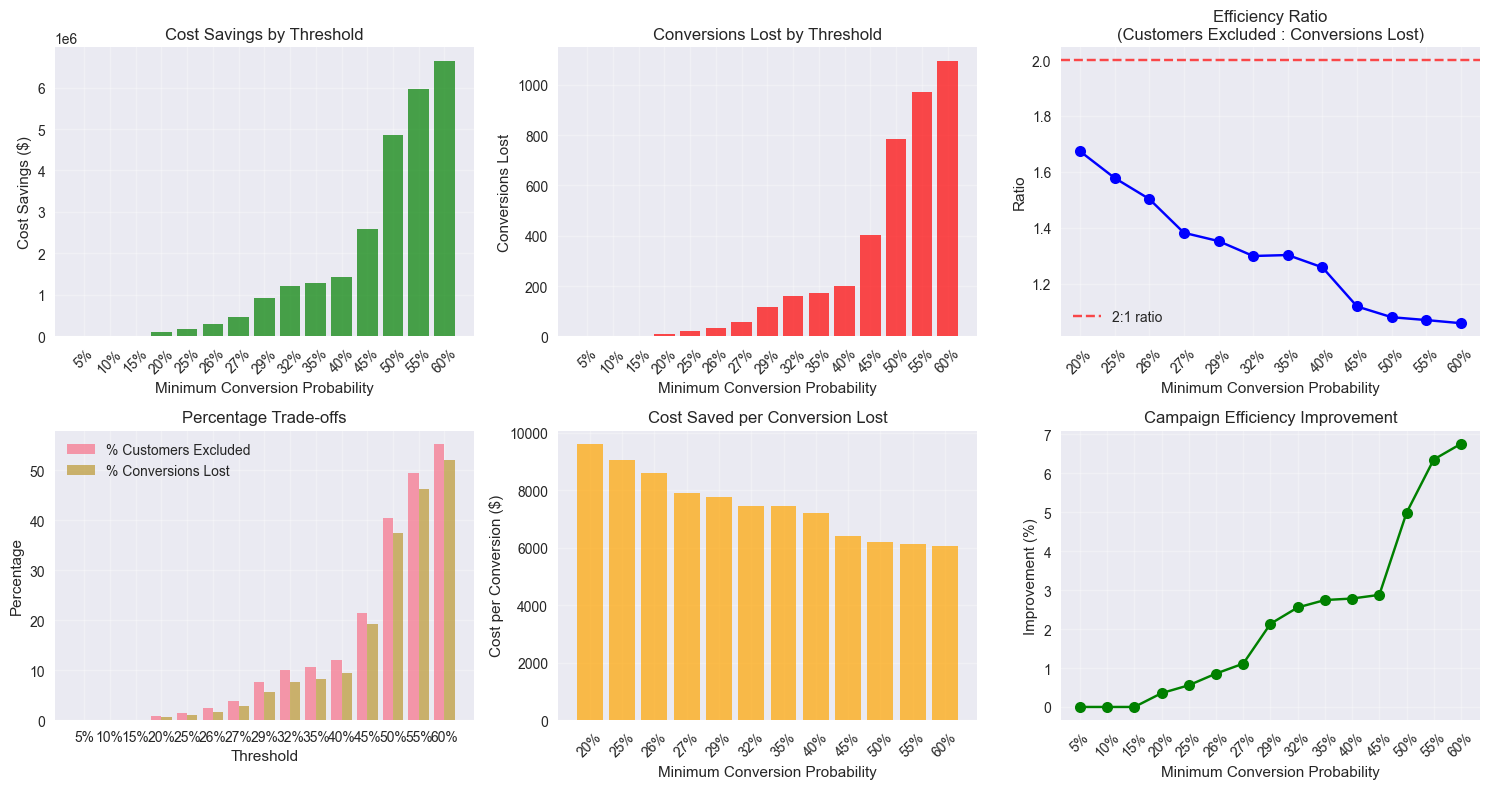

In [184]:
#Question 3: Can we save if we stop sending campains to low probability conversion groups? How is spending related to conversion? 
def analyze_cost_savings_with_conversions_lost(model, X_test, y_test, avg_ad_spend_per_customer=None):
    """
    Analyze cost savings from excluding low-conversion probability customers
    Includes conversions lost to show the complete trade-off
    """
    print(" MARKETING COST SAVINGS ANALYSIS")
    print("="*55)
    print(" Goal: Calculate cost savings and conversion trade-offs")
    
    # Get predicted conversion probabilities
    y_proba_conversion = model.predict_proba(X_test)[:, 1]
    
    # Get average ad spend
    if avg_ad_spend_per_customer is None:
        if 'AdSpend' in X_test.columns:
            avg_ad_spend_per_customer = X_test['AdSpend'].mean()
            print(f" Using average ad spend from data: ${avg_ad_spend_per_customer:.2f} per customer")
        else:
            avg_ad_spend_per_customer = 50
            print(f" Using estimated ad spend: ${avg_ad_spend_per_customer:.2f} per customer")
    
    # Create probability thresholds
    thresholds = [0.05, 0.10, 0.15, 0.20, 0.25, .26,  .27, .29, .32, .35, .40, 0.45, 0.50, 0.55, 0.60]
    
    print(f"\n🔍 COST SAVINGS & CONVERSION TRADE-OFFS:")
    print(f"{'Threshold':<10} {'Customers':<10} {'Conversions':<12} {'Cost':<12} {'Remaining':<10} {'Improved':<10}")
    print(f"{'(Min Prob)':<10} {'Excluded':<10} {'Lost':<12} {'Savings':<12} {'Conv Rate':<10} {'Efficiency':<10}")
    print("-" * 75)
    
    total_customers = len(y_test)
    total_conversions = y_test.sum()
    baseline_conversion_rate = total_conversions / total_customers
    
    print(f"{'Baseline':<10} {0:<10} {0:<12} ${0:<11,.0f} {baseline_conversion_rate:<10.1%} {0:<10.1%}")
    
    results = []
    
    for threshold in thresholds:
        # Customers below threshold (to exclude)
        below_threshold = y_proba_conversion < threshold
        excluded_customers = below_threshold.sum()
        excluded_percentage = excluded_customers / total_customers
        
        # Conversions lost from excluded customers
        conversions_lost = y_test[below_threshold].sum()
        
        # Cost savings
        cost_savings = excluded_customers * avg_ad_spend_per_customer
        
        # Remaining customers and their conversion rate
        remaining_customers = total_customers - excluded_customers
        if remaining_customers > 0:
            remaining_conversions = y_test[~below_threshold].sum()
            remaining_conversion_rate = remaining_conversions / remaining_customers
            efficiency_improvement = (remaining_conversion_rate / baseline_conversion_rate) - 1
        else:
            remaining_conversion_rate = 0
            efficiency_improvement = 0
        
        results.append({
            'threshold': threshold,
            'excluded_customers': excluded_customers,
            'excluded_percentage': excluded_percentage,
            'conversions_lost': conversions_lost,
            'conversions_lost_percentage': conversions_lost / total_conversions,
            'cost_savings': cost_savings,
            'remaining_conversion_rate': remaining_conversion_rate,
            'efficiency_improvement': efficiency_improvement,
            'cost_per_conversion_saved': cost_savings / conversions_lost if conversions_lost > 0 else 0
        })
        
        print(f"{threshold:<10.0%} {excluded_customers:<10} {conversions_lost:<12} "
              f"${cost_savings:<11,.0f} {remaining_conversion_rate:<10.1%} "
              f"{efficiency_improvement:<10.1%}")
    
    # Convert to DataFrame for analysis
    results_df = pd.DataFrame(results)
    
    print(f" DETAILED TRADE-OFF ANALYSIS:")
    print(f"{'Threshold':<10} {'% Customers':<12} {'% Conversions':<13} {'Cost per':<12}")
    print(f"{'(Min Prob)':<10} {'Excluded':<12} {'Lost':<13} {'Conv Lost':<12}")
    print("-" * 50)
    
    for _, row in results_df.iterrows():
        cost_per_conv = row['cost_per_conversion_saved']
        print(f"{row['threshold']:<10.0%} {row['excluded_percentage']:<12.1%} "
              f"{row['conversions_lost_percentage']:<13.1%} "
              f"${cost_per_conv:<11,.0f}")
    
    # Find sweet spot (good cost savings with reasonable conversion loss)
    # Look for threshold where we exclude more customers than conversions lost (percentage-wise)
    results_df['efficiency_ratio'] = results_df['excluded_percentage'] / results_df['conversions_lost_percentage']
    
    print(f"\n💡 KEY INSIGHTS:")
    
    # Best efficiency ratios (exclude more customers % than conversions % lost)
    efficient_thresholds = results_df[results_df['efficiency_ratio'] > 2.0]  # Exclude 2x more customers than conversions lost
    
    if len(efficient_thresholds) > 0:
        best_efficiency = efficient_thresholds.iloc[0]
        print(f"    Sweet Spot: {best_efficiency['threshold']:.0%} threshold")
        print(f"     • Exclude {best_efficiency['excluded_percentage']:.1%} of customers")
        print(f"     • Lose only {best_efficiency['conversions_lost_percentage']:.1%} of conversions")
        print(f"     • Save ${best_efficiency['cost_savings']:,.0f}")
        print(f"     • Efficiency ratio: {best_efficiency['efficiency_ratio']:.1f}:1")
    
    # Highest absolute savings
    max_savings = results_df.loc[results_df['cost_savings'].idxmax()]
    print(f"\n    Maximum Savings: {max_savings['threshold']:.0%} threshold")
    print(f"     • Save ${max_savings['cost_savings']:,.0f}")
    print(f"     • Lose {max_savings['conversions_lost']} conversions ({max_savings['conversions_lost_percentage']:.1%})")
    
    # Cost per conversion lost
    min_cost_per_conv = results_df[results_df['cost_per_conversion_saved'] > 0]['cost_per_conversion_saved'].min()
    cheapest_conv_loss = results_df[results_df['cost_per_conversion_saved'] == min_cost_per_conv].iloc[0]
    print(f"  Cheapest Conversion Loss: {cheapest_conv_loss['threshold']:.0%} threshold")
    print(f"     • Save ${min_cost_per_conv:.0f} per conversion lost")
    print(f"     • Total savings: ${cheapest_conv_loss['cost_savings']:,.0f}")
    
    # Create visualization
    plt.figure(figsize=(15, 8))
    
    # Cost savings vs conversions lost
    plt.subplot(2, 3, 1)
    plt.bar([f"{t:.0%}" for t in results_df['threshold']], results_df['cost_savings'], 
           color='green', alpha=0.7)
    plt.title('Cost Savings by Threshold')
    plt.xlabel('Minimum Conversion Probability')
    plt.ylabel('Cost Savings ($)')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    # Conversions lost
    plt.subplot(2, 3, 2)
    plt.bar([f"{t:.0%}" for t in results_df['threshold']], results_df['conversions_lost'], 
           color='red', alpha=0.7)
    plt.title('Conversions Lost by Threshold')
    plt.xlabel('Minimum Conversion Probability')
    plt.ylabel('Conversions Lost')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    # Efficiency ratio
    plt.subplot(2, 3, 3)
    plt.plot([f"{t:.0%}" for t in results_df['threshold']], results_df['efficiency_ratio'], 
            'bo-', markersize=8)
    plt.axhline(y=2, color='red', linestyle='--', alpha=0.7, label='2:1 ratio')
    plt.title('Efficiency Ratio\n(Customers Excluded : Conversions Lost)')
    plt.xlabel('Minimum Conversion Probability')
    plt.ylabel('Ratio')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Percentage comparison
    plt.subplot(2, 3, 4)
    x_pos = range(len(results_df))
    plt.bar([i - 0.2 for i in x_pos], results_df['excluded_percentage'] * 100, 0.4, 
           label='% Customers Excluded', alpha=0.7)
    plt.bar([i + 0.2 for i in x_pos], results_df['conversions_lost_percentage'] * 100, 0.4, 
           label='% Conversions Lost', alpha=0.7)
    plt.title('Percentage Trade-offs')
    plt.xlabel('Threshold')
    plt.ylabel('Percentage')
    plt.xticks(x_pos, [f"{t:.0%}" for t in results_df['threshold']])
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Cost per conversion lost
    plt.subplot(2, 3, 5)
    valid_costs = results_df[results_df['cost_per_conversion_saved'] > 0]
    plt.bar([f"{t:.0%}" for t in valid_costs['threshold']], valid_costs['cost_per_conversion_saved'], 
           color='orange', alpha=0.7)
    plt.title('Cost Saved per Conversion Lost')
    plt.xlabel('Minimum Conversion Probability')
    plt.ylabel('Cost per Conversion ($)')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    # Campaign efficiency improvement
    plt.subplot(2, 3, 6)
    plt.plot([f"{t:.0%}" for t in results_df['threshold']], 
            results_df['efficiency_improvement'] * 100, 'go-', markersize=8)
    plt.title('Campaign Efficiency Improvement')
    plt.xlabel('Minimum Conversion Probability')
    plt.ylabel('Improvement (%)')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return results_df

# Run the enhanced analysis
print("🚀 Running enhanced cost savings analysis with conversion trade-offs...")
enhanced_results = analyze_cost_savings_with_conversions_lost(
    tuned_xgb_model, X_test_engineered, y_test
)

In [185]:

# BREAK-EVEN ANALYSIS: 25% Probability Threshold Strategy
print(" BREAK-EVEN ANALYSIS: 25% PROBABILITY THRESHOLD STRATEGY")
print("="*65)
print(" Goal: Find break-even customer value for excluding customers with <25% conversion probability")
print(" Using model predictions on test set\n")

# 1. Analyze customers below 25% threshold
threshold = 0.25
test_predictions = tuned_xgb_model.predict_proba(X_test_engineered)[:, 1]

# Create analysis dataframe
strategy_analysis = pd.DataFrame({
    'Predicted_Probability': test_predictions,
    'Actual_Conversion': y_test.values,
    'AdSpend': X_test_engineered['AdSpend'].values
})

# Customers below threshold (to exclude)
below_threshold = strategy_analysis[strategy_analysis['Predicted_Probability'] < threshold].copy()
above_threshold = strategy_analysis[strategy_analysis['Predicted_Probability'] >= threshold].copy()

print(f" STRATEGY IMPACT ANALYSIS:")
print("-" * 40)
print(f"Customers below {threshold:.0%} probability threshold:")
print(f"  • Count: {len(below_threshold):,} customers ({len(below_threshold)/len(strategy_analysis):.1%} of total)")
print(f"  • Average predicted probability: {below_threshold['Predicted_Probability'].mean():.1%}")
print(f"  • Actual conversion rate: {below_threshold['Actual_Conversion'].mean():.1%}")
print(f"  • Total ad spend: ${below_threshold['AdSpend'].sum():,.0f}")
print(f"  • Average ad spend per customer: ${below_threshold['AdSpend'].mean():,.0f}")

conversions_lost = below_threshold['Actual_Conversion'].sum()
total_savings = below_threshold['AdSpend'].sum()

print(f"\nStrategy outcomes:")
print(f"  • Conversions lost: {conversions_lost}")
print(f"  • Total cost savings: ${total_savings:,.0f}")
print(f"  • Cost per conversion lost: ${total_savings/max(conversions_lost,1):,.0f}")

# 2. Break-even calculation
print(f" BREAK-EVEN CUSTOMER VALUE CALCULATION:")
print("-" * 45)

# Different scenarios for customer lifetime value
print(f"For this strategy to break even, each lost conversion must be worth LESS than:")
print(f"${total_savings/max(conversions_lost,1):,.0f} per customer")

print(f"\nBreak-even scenarios:")

# Scenario 1: Cost savings vs revenue lost
cost_per_conversion_lost = total_savings / max(conversions_lost, 1)
print(f"\n1. SIMPLE BREAK-EVEN:")
print(f"   • Cost saved per conversion lost: ${cost_per_conversion_lost:,.0f}")
print(f"   • Break-even customer value: ${cost_per_conversion_lost:,.0f}")
print(f"   • If customer value > ${cost_per_conversion_lost:,.0f}, strategy is PROFITABLE")
print(f"   • If customer value < ${cost_per_conversion_lost:,.0f}, strategy is UNPROFITABLE")

# Scenario 2: Consider profit margins
profit_margins = [0.1, 0.2, 0.3, 0.4, 0.5]
print(f"\n2. BREAK-EVEN BY PROFIT MARGIN:")
for margin in profit_margins:
    required_revenue = cost_per_conversion_lost / margin
    print(f"   • {margin:.0%} profit margin → Customer must generate ${required_revenue:,.0f} revenue")

# 3. Sensitivity analysis
print(f" SENSITIVITY ANALYSIS:")
print("-" * 30)

# What if we're more/less accurate in our predictions?
accuracy_scenarios = [0.7, 0.8, 0.9, 1.0, 1.1, 1.2]
print(f"Break-even customer value if our model accuracy varies:")

for accuracy in accuracy_scenarios:
    adjusted_conversions_lost = conversions_lost * accuracy
    adjusted_cost_per_conv = total_savings / max(adjusted_conversions_lost, 1)
    print(f"  • {accuracy:.0%} model accuracy: ${adjusted_cost_per_conv:,.0f} per customer")

# 4. ROI calculation
print(f" ROI SCENARIOS:")
print("-" * 20)

customer_values = [1000, 2000, 5000, 7500, 10000, 15000, 20000]
print(f"ROI if average customer value is:")

for customer_value in customer_values:
    revenue_lost = conversions_lost * customer_value
    net_benefit = total_savings - revenue_lost
    roi = (net_benefit / total_savings) * 100 if total_savings > 0 else 0
    
    status = "PROFITABLE" if net_benefit > 0 else "❌ UNPROFITABLE"
    print(f"  • ${customer_value:,}: ROI = {roi:+.1f}% ({status})")

# 5. Threshold sensitivity
print(f" THRESHOLD SENSITIVITY ANALYSIS:")
print("-" * 35)

thresholds = [0.15, 0.20, 0.25, 0.30, 0.35]
print(f"Break-even customer value at different thresholds:")

for thresh in thresholds:
    thresh_below = strategy_analysis[strategy_analysis['Predicted_Probability'] < thresh]
    thresh_conversions_lost = thresh_below['Actual_Conversion'].sum()
    thresh_savings = thresh_below['AdSpend'].sum()
    
    if thresh_conversions_lost > 0:
        thresh_breakeven = thresh_savings / thresh_conversions_lost
        excluded_pct = len(thresh_below) / len(strategy_analysis) * 100
        conv_lost_pct = thresh_conversions_lost / strategy_analysis['Actual_Conversion'].sum() * 100
        
        print(f"  • {thresh:.0%} threshold: ${thresh_breakeven:,.0f} breakeven")
        print(f"    - Exclude {excluded_pct:.1f}% customers, lose {conv_lost_pct:.1f}% conversions")


 BREAK-EVEN ANALYSIS: 25% PROBABILITY THRESHOLD STRATEGY
 Goal: Find break-even customer value for excluding customers with <25% conversion probability
 Using model predictions on test set

 STRATEGY IMPACT ANALYSIS:
----------------------------------------
Customers below 25% probability threshold:
  • Count: 36 customers (1.5% of total)
  • Average predicted probability: 20.4%
  • Actual conversion rate: 55.6%
  • Total ad spend: $60,160
  • Average ad spend per customer: $1,671

Strategy outcomes:
  • Conversions lost: 20
  • Total cost savings: $60,160
  • Cost per conversion lost: $3,008
 BREAK-EVEN CUSTOMER VALUE CALCULATION:
---------------------------------------------
For this strategy to break even, each lost conversion must be worth LESS than:
$3,008 per customer

Break-even scenarios:

1. SIMPLE BREAK-EVEN:
   • Cost saved per conversion lost: $3,008
   • Break-even customer value: $3,008
   • If customer value > $3,008, strategy is PROFITABLE
   • If customer value < $3,00

In [186]:
# MODEL'S SPENDING RESPONSE CURVE ANALYSIS
print("📈 MODEL'S SPENDING RESPONSE CURVE ANALYSIS")
print("="*55)
print("🎯 Goal: Understand how the model predicts probability changes with ad spend")
print("📊 Creating spending response curves from the model\n")

# 1. Select a representative customer profile for analysis
# Use median values for other features to isolate ad spend effect
median_customer = X_test_engineered.median()
print("📊 BASELINE CUSTOMER PROFILE (using median values):")
print("-" * 45)
for feature, value in median_customer.head(10).items():
    print(f"  {feature}: {value:.2f}")

# 2. Create spending scenarios
spending_levels = np.arange(500, 10500, 500)  # $500 to $10,000 in $500 increments
probability_predictions = []

print(f"\n🔬 SPENDING RESPONSE ANALYSIS:")
print("-" * 35)
print(f"Testing {len(spending_levels)} different spending levels...")

# Create test scenarios by varying only AdSpend
for spend_level in spending_levels:
    # Create a copy of median customer
    test_customer = median_customer.copy()
    test_customer['AdSpend'] = spend_level
    
    # Reshape for prediction (model expects 2D array)
    test_customer_reshaped = test_customer.values.reshape(1, -1)
    
    # Get probability prediction
    probability = tuned_xgb_model.predict_proba(test_customer_reshaped)[0, 1]
    probability_predictions.append(probability)
    
# Create results dataframe
spending_response = pd.DataFrame({
    'AdSpend': spending_levels,
    'Predicted_Probability': probability_predictions
})

# Calculate marginal effects
spending_response['Marginal_Effect'] = spending_response['Predicted_Probability'].diff()
spending_response['Cumulative_Effect'] = (spending_response['Predicted_Probability'] - 
                                        spending_response['Predicted_Probability'].iloc[0])

print("SPENDING RESPONSE CURVE:")
print(spending_response.round(4))

# 3. Key insights from the response curve
print(f"\n💡 KEY MODEL INSIGHTS:")
print("-" * 25)

max_prob = spending_response['Predicted_Probability'].max()
min_prob = spending_response['Predicted_Probability'].min()
total_effect = max_prob - min_prob

print(f"Minimum probability (${spending_levels[0]:,}): {min_prob:.1%}")
print(f"Maximum probability (${spending_levels[-1]:,}): {max_prob:.1%}")
print(f"Total effect of spending: {total_effect:+.1%}")

# Find diminishing returns point
positive_marginal = spending_response[spending_response['Marginal_Effect'] > 0]
if len(positive_marginal) > 0:
    best_marginal_idx = positive_marginal['Marginal_Effect'].idxmax()
    best_spend = spending_response.loc[best_marginal_idx, 'AdSpend']
    best_marginal = spending_response.loc[best_marginal_idx, 'Marginal_Effect']
    print(f"Highest marginal effect at: ${best_spend:,} (+{best_marginal:.1%})")

# 4. Cost-effectiveness analysis
print(f"\n💰 COST-EFFECTIVENESS ANALYSIS:")
print("-" * 35)

spending_response['Cost_Per_Probability_Point'] = (
    spending_response['AdSpend'].diff() / 
    (spending_response['Predicted_Probability'].diff() * 100)
).round(0)

# Remove first row (NaN) and infinite values
cost_effectiveness = spending_response.dropna()
cost_effectiveness = cost_effectiveness[cost_effectiveness['Cost_Per_Probability_Point'] != np.inf]

if len(cost_effectiveness) > 0:
    print("Cost per 1 percentage point probability increase:")
    for idx, row in cost_effectiveness.iterrows():
        if not pd.isna(row['Cost_Per_Probability_Point']) and row['Cost_Per_Probability_Point'] > 0:
            print(f"  ${row['AdSpend']:,} spend level: ${row['Cost_Per_Probability_Point']:,.0f} per 1% prob increase")

# 5. Sweet spot analysis
print(f"\n🎯 SWEET SPOT ANALYSIS:")
print("-" * 25)

# Find the most cost-effective spending ranges
if len(cost_effectiveness) > 0:
    # Best cost-effectiveness (lowest cost per probability point)
    best_efficiency_idx = cost_effectiveness['Cost_Per_Probability_Point'].idxmin()
    if not pd.isna(best_efficiency_idx):
        best_efficiency_spend = cost_effectiveness.loc[best_efficiency_idx, 'AdSpend']
        best_efficiency_cost = cost_effectiveness.loc[best_efficiency_idx, 'Cost_Per_Probability_Point']
        
        print(f"Most cost-effective spending: ${best_efficiency_spend:,}")
        print(f"Cost per probability point: ${best_efficiency_cost:,.0f}")

# 6. Practical spending recommendations
print(f"\n📋 PRACTICAL SPENDING RECOMMENDATIONS:")
print("-" * 40)

# Find spending levels that give significant probability boosts
baseline_prob = spending_response['Predicted_Probability'].iloc[0]
significant_improvements = spending_response[
    spending_response['Predicted_Probability'] > baseline_prob + 0.05  # 5% improvement
]

if len(significant_improvements) > 0:
    min_spend_for_improvement = significant_improvements['AdSpend'].min()
    prob_at_min_spend = significant_improvements['Predicted_Probability'].iloc[0]
    
    print(f"Minimum spend for 5%+ probability boost: ${min_spend_for_improvement:,}")
    print(f"Probability at that level: {prob_at_min_spend:.1%}")
    print(f"Improvement: {prob_at_min_spend - baseline_prob:+.1%}")

# 7. Diminishing returns analysis
print(f"\n📉 DIMINISHING RETURNS ANALYSIS:")
print("-" * 35)

# Calculate second derivative (acceleration/deceleration)
spending_response['Second_Derivative'] = spending_response['Marginal_Effect'].diff()

diminishing_starts = spending_response[spending_response['Second_Derivative'] < -0.001]
if len(diminishing_starts) > 0:
    diminishing_point = diminishing_starts['AdSpend'].iloc[0]
    print(f"Diminishing returns start around: ${diminishing_point:,}")
    print("→ Spending beyond this point becomes less efficient")
else:
    print("No clear diminishing returns point found in tested range")

# 8. Visualization data preparation
print(f"\n📊 MODEL'S SPENDING ELASTICITY:")
print("-" * 30)

# Calculate elasticity at different points
for i in range(1, len(spending_response), 3):  # Every 3rd point for readability
    if i < len(spending_response):
        spend = spending_response.iloc[i]['AdSpend']
        prob = spending_response.iloc[i]['Predicted_Probability']
        
        if i > 0:
            prev_spend = spending_response.iloc[i-1]['AdSpend']
            prev_prob = spending_response.iloc[i-1]['Predicted_Probability']
            
            # Elasticity = % change in probability / % change in spend
            prob_change = (prob - prev_prob) / prev_prob
            spend_change = (spend - prev_spend) / prev_spend
            
            if spend_change != 0:
                elasticity = prob_change / spend_change
                print(f"  At ${spend:,}: Elasticity = {elasticity:.2f}")

# 9. ROI calculation at different spending levels
print(f"\n💵 ROI SCENARIOS BY SPENDING LEVEL:")
print("-" * 35)

# Assume different customer values
customer_values = [5000, 7500, 10000]

print("ROI if customer lifetime value is:")
for customer_value in customer_values:
    print(f"\n  ${customer_value:,} customer value:")
    
    for idx, row in spending_response.iloc[::4].iterrows():  # Every 4th row
        spend = row['AdSpend']
        prob = row['Predicted_Probability']
        
        expected_revenue = prob * customer_value
        roi = ((expected_revenue - spend) / spend) * 100
        
        print(f"    ${spend:,} spend → {prob:.1%} prob → {roi:+.0f}% ROI")

print(f"\n🎯 MODEL'S KEY MESSAGE:")
print(f"The model predicts spending ${spending_levels[0]:,} to ${spending_levels[-1]:,}")
print(f"changes conversion probability by {total_effect:+.1%}")
print(f"This suggests {'STRONG' if abs(total_effect) > 0.15 else 'MODERATE' if abs(total_effect) > 0.05 else 'WEAK'} spend sensitivity")

📈 MODEL'S SPENDING RESPONSE CURVE ANALYSIS
🎯 Goal: Understand how the model predicts probability changes with ad spend
📊 Creating spending response curves from the model

📊 BASELINE CUSTOMER PROFILE (using median values):
---------------------------------------------
  Age: 43.00
  Income: 85462.00
  LoyaltyPoints: 2482.00
  AdSpend: 5092.24
  Gender: 0.00
  returning_customer: 1.00
  CampaignChannel_Email: 0.00
  CampaignChannel_PPC: 0.00
  CampaignChannel_Referral: 0.00
  CampaignChannel_SEO: 0.00

🔬 SPENDING RESPONSE ANALYSIS:
-----------------------------------
Testing 20 different spending levels...
SPENDING RESPONSE CURVE:
    AdSpend  Predicted_Probability  Marginal_Effect  Cumulative_Effect
0       500                 0.4473              NaN             0.0000
1      1000                 0.4766           0.0294             0.0294
2      1500                 0.4744          -0.0023             0.0271
3      2000                 0.4683          -0.0061             0.0210
4      2

In [187]:
# MODEL'S SPENDING RESPONSE CURVE ANALYSIS 
print(" MODEL'S SPENDING RESPONSE CURVE ANALYSIS")
print("="*55)
print(" Goal: Understand how the model predicts probability changes with ad spend")
print(" Creating spending response curves from the model\n")

# 1. Select a representative customer profile for analysis
# Use median values for other features to isolate ad spend effect
median_customer = X_test_engineered.median()
print(" BASELINE CUSTOMER PROFILE (using median values):")
print("-" * 45)
for feature, value in median_customer.head(10).items():
    print(f"  {feature}: {value:.2f}")

# 2. Create spending scenarios
spending_levels = np.arange(500, 10500, 500)  # $500 to $10,000 in $500 increments
probability_predictions = []

print(f"\n🔬 SPENDING RESPONSE ANALYSIS:")
print("-" * 35)
print(f"Testing {len(spending_levels)} different spending levels...")

# Create test scenarios by varying only AdSpend
for spend_level in spending_levels:
    # Create a copy of median customer
    test_customer = median_customer.copy()
    test_customer['AdSpend'] = spend_level
    
    # Reshape for prediction (model expects 2D array)
    test_customer_reshaped = test_customer.values.reshape(1, -1)
    
    # Get probability prediction
    probability = tuned_xgb_model.predict_proba(test_customer_reshaped)[0, 1]
    probability_predictions.append(probability)
    
# Create results dataframe
spending_response = pd.DataFrame({
    'AdSpend': spending_levels,
    'Predicted_Probability': probability_predictions
})

# Calculate marginal effects
spending_response['Marginal_Effect'] = spending_response['Predicted_Probability'].diff()
spending_response['Cumulative_Effect'] = (spending_response['Predicted_Probability'] - 
                                        spending_response['Predicted_Probability'].iloc[0])

print("SPENDING RESPONSE CURVE:")
print(spending_response.round(4))

# 3. Calculate cost per 1% probability increase
print(f"\n💰 COST PER 1% PROBABILITY INCREASE ANALYSIS:")
print("-" * 45)

spending_response['Cost_Per_Probability_Point'] = (
    spending_response['AdSpend'].diff() / 
    (spending_response['Predicted_Probability'].diff() * 100)
).round(0)

# Remove first row (NaN) and infinite values
cost_effectiveness = spending_response.dropna()
cost_effectiveness = cost_effectiveness[cost_effectiveness['Cost_Per_Probability_Point'] != np.inf]
cost_effectiveness = cost_effectiveness[cost_effectiveness['Cost_Per_Probability_Point'] > 0]

if len(cost_effectiveness) > 0:
    # Calculate average cost per 1% probability increase
    average_cost_per_1pct = cost_effectiveness['Cost_Per_Probability_Point'].mean()
    median_cost_per_1pct = cost_effectiveness['Cost_Per_Probability_Point'].median()
    min_cost_per_1pct = cost_effectiveness['Cost_Per_Probability_Point'].min()
    max_cost_per_1pct = cost_effectiveness['Cost_Per_Probability_Point'].max()
    
    print(f" SUMMARY STATISTICS - Cost per 1% probability increase:")
    print(f"  • Average: ${average_cost_per_1pct:,.0f}")
    print(f"  • Median:  ${median_cost_per_1pct:,.0f}")
    print(f"  • Minimum: ${min_cost_per_1pct:,.0f}")
    print(f"  • Maximum: ${max_cost_per_1pct:,.0f}")
    print(f"  • Range:   ${max_cost_per_1pct - min_cost_per_1pct:,.0f}")
    
    print(f"\nDetailed breakdown by spending level:")
    for idx, row in cost_effectiveness.iterrows():
        print(f"  ${row['AdSpend']:,} level: ${row['Cost_Per_Probability_Point']:,.0f} per 1% increase")

# 4. Overall efficiency calculation
min_prob = spending_response['Predicted_Probability'].min()
max_prob = spending_response['Predicted_Probability'].max()
total_prob_increase = (max_prob - min_prob) * 100  # Convert to percentage points
total_spend_increase = spending_levels[-1] - spending_levels[0]

overall_cost_per_1pct = total_spend_increase / total_prob_increase if total_prob_increase > 0 else 0

print(f"\n OVERALL EFFICIENCY METRICS:")
print("-" * 30)
print(f"Total probability increase: {total_prob_increase:.1f} percentage points")
print(f"Total spending increase: ${total_spend_increase:,}")
print(f"Overall cost per 1% probability increase: ${overall_cost_per_1pct:,.0f}")

# 5. Key insights from the response curve
print(f" KEY MODEL INSIGHTS:")
print("-" * 25)

print(f"Minimum probability (${spending_levels[0]:,}): {min_prob:.1%}")
print(f"Maximum probability (${spending_levels[-1]:,}): {max_prob:.1%}")
print(f"Total effect of spending: {max_prob - min_prob:+.1%}")

# Find most and least efficient spending ranges
if len(cost_effectiveness) > 0:
    most_efficient_idx = cost_effectiveness['Cost_Per_Probability_Point'].idxmin()
    least_efficient_idx = cost_effectiveness['Cost_Per_Probability_Point'].idxmax()
    
    most_efficient_spend = cost_effectiveness.loc[most_efficient_idx, 'AdSpend']
    most_efficient_cost = cost_effectiveness.loc[most_efficient_idx, 'Cost_Per_Probability_Point']
    
    least_efficient_spend = cost_effectiveness.loc[least_efficient_idx, 'AdSpend']
    least_efficient_cost = cost_effectiveness.loc[least_efficient_idx, 'Cost_Per_Probability_Point']
    
    print(f"\nMost efficient spending range:")
    print(f"  • At ${most_efficient_spend:,}: ${most_efficient_cost:,.0f} per 1% increase")
    print(f"Least efficient spending range:")
    print(f"  • At ${least_efficient_spend:,}: ${least_efficient_cost:,.0f} per 1% increase")
    
    efficiency_ratio = least_efficient_cost / most_efficient_cost
    print(f"Efficiency variation: {efficiency_ratio:.1f}x difference between best and worst")

# 6. Business interpretation
print(f" BUSINESS INTERPRETATION:")
print("-" * 30)

if overall_cost_per_1pct < 1000:
    interpretation = "VERY EFFICIENT - Low cost to increase conversion probability"
elif overall_cost_per_1pct < 2500:
    interpretation = "MODERATELY EFFICIENT - Reasonable cost for probability increases"
elif overall_cost_per_1pct < 5000:
    interpretation = "LESS EFFICIENT - High cost for small probability gains"
else:
    interpretation = "INEFFICIENT - Very expensive to increase conversion probability"

print(f"Model suggests spending is: {interpretation}")
print(f"Average investment of ${average_cost_per_1pct:,.0f} needed for each 1% probability boost")

# 7. ROI break-even analysis
print(f" ROI BREAK-EVEN ANALYSIS:")
print("-" * 30)

customer_lifetime_values = [3000, 5000, 7500, 10000, 15000]

print("Break-even analysis for different customer values:")
print("(Customer value needed to justify average cost per 1% increase)")

for clv in customer_lifetime_values:
    # For 1% increase to be profitable, CLV * 0.01 should be > cost per 1%
    breakeven_prob_increase = (average_cost_per_1pct / clv) * 100
    is_profitable = breakeven_prob_increase <= 1.0
    

print(f"\nTo justify average cost of ${average_cost_per_1pct:,.0f} per 1% increase:")
print(f"Customer lifetime value should be at least ${average_cost_per_1pct * 100:,.0f}")

 MODEL'S SPENDING RESPONSE CURVE ANALYSIS
 Goal: Understand how the model predicts probability changes with ad spend
 Creating spending response curves from the model

 BASELINE CUSTOMER PROFILE (using median values):
---------------------------------------------
  Age: 43.00
  Income: 85462.00
  LoyaltyPoints: 2482.00
  AdSpend: 5092.24
  Gender: 0.00
  returning_customer: 1.00
  CampaignChannel_Email: 0.00
  CampaignChannel_PPC: 0.00
  CampaignChannel_Referral: 0.00
  CampaignChannel_SEO: 0.00

🔬 SPENDING RESPONSE ANALYSIS:
-----------------------------------
Testing 20 different spending levels...
SPENDING RESPONSE CURVE:
    AdSpend  Predicted_Probability  Marginal_Effect  Cumulative_Effect
0       500                 0.4473              NaN             0.0000
1      1000                 0.4766           0.0294             0.0294
2      1500                 0.4744          -0.0023             0.0271
3      2000                 0.4683          -0.0061             0.0210
4      2500 

In [1]:
# MODEL PERFORMANCE COMPARISON: XGBoost vs Baseline Logistic Regression

# Get baseline logistic regression results
baseline_pred = baseline_model.predict(X_test_engineered)
baseline_cm = confusion_matrix(y_test, baseline_pred)
baseline_tn_actual, baseline_fp, baseline_fn, baseline_tp = baseline_cm.ravel()

# Calculate baseline metrics
baseline_metrics = {
    'model_name': 'Baseline Logistic Regression',
    'class_0_precision': baseline_tn_actual / (baseline_tn_actual + baseline_fp) if (baseline_tn_actual + baseline_fp) > 0 else 0,
    'class_0_recall': baseline_tn_actual / (baseline_tn_actual + baseline_fn) if (baseline_tn_actual + baseline_fn) > 0 else 0,
    'class_1_precision': baseline_tp / (baseline_tp + baseline_fp) if (baseline_tp + baseline_fp) > 0 else 0,
    'class_1_recall': baseline_tp / (baseline_tp + baseline_fn) if (baseline_tp + baseline_fn) > 0 else 0,
    'accuracy': accuracy_score(y_test, baseline_pred),
    'auc': roc_auc_score(y_test, baseline_proba),
    'true_negatives': baseline_tn_actual,
    'true_positives': baseline_tp,
    'false_negatives': baseline_fn,
    'false_positives': baseline_fp
}

# Calculate F1 scores for baseline
baseline_class_0_f1 = 2 * baseline_metrics['class_0_precision'] * baseline_metrics['class_0_recall'] / (baseline_metrics['class_0_precision'] + baseline_metrics['class_0_recall']) if (baseline_metrics['class_0_precision'] + baseline_metrics['class_0_recall']) > 0 else 0
baseline_class_1_f1 = 2 * baseline_metrics['class_1_precision'] * baseline_metrics['class_1_recall'] / (baseline_metrics['class_1_precision'] + baseline_metrics['class_1_recall']) if (baseline_metrics['class_1_precision'] + baseline_metrics['class_1_recall']) > 0 else 0

baseline_metrics.update({
    'class_0_f1': baseline_class_0_f1,
    'class_1_f1': baseline_class_1_f1,
    'macro_avg_precision': (baseline_metrics['class_0_precision'] + baseline_metrics['class_1_precision']) / 2,
    'macro_avg_recall': (baseline_metrics['class_0_recall'] + baseline_metrics['class_1_recall']) / 2,
    'macro_avg_f1': (baseline_class_0_f1 + baseline_class_1_f1) / 2
})

# Your XGBoost results (recalculated for consistency)
xgboost_metrics = {
    'model_name': 'Tuned XGBoost Model',
    'class_0_precision': tuned_tn / (tuned_tn + tuned_fp) if (tuned_tn + tuned_fp) > 0 else 0,
    'class_0_recall': tuned_tn / (tuned_tn + tuned_fn) if (tuned_tn + tuned_fn) > 0 else 0,
    'class_1_precision': tuned_tp / (tuned_tp + tuned_fp) if (tuned_tp + tuned_fp) > 0 else 0,
    'class_1_recall': tuned_tp / (tuned_tp + tuned_fn) if (tuned_tp + tuned_fn) > 0 else 0,
    'accuracy': (tuned_tn + tuned_tp) / (tuned_tn + tuned_tp + tuned_fn + tuned_fp),
    'auc': tuned_auc,
    'true_negatives': tuned_tn,
    'true_positives': tuned_tp,
    'false_negatives': tuned_fn,
    'false_positives': tuned_fp
}

# Calculate F1 scores for XGBoost
xgb_class_0_f1 = 2 * xgboost_metrics['class_0_precision'] * xgboost_metrics['class_0_recall'] / (xgboost_metrics['class_0_precision'] + xgboost_metrics['class_0_recall']) if (xgboost_metrics['class_0_precision'] + xgboost_metrics['class_0_recall']) > 0 else 0
xgb_class_1_f1 = 2 * xgboost_metrics['class_1_precision'] * xgboost_metrics['class_1_recall'] / (xgboost_metrics['class_1_precision'] + xgboost_metrics['class_1_recall']) if (xgboost_metrics['class_1_precision'] + xgboost_metrics['class_1_recall']) > 0 else 0

xgboost_metrics.update({
    'class_0_f1': xgb_class_0_f1,
    'class_1_f1': xgb_class_1_f1,
    'macro_avg_precision': (xgboost_metrics['class_0_precision'] + xgboost_metrics['class_1_precision']) / 2,
    'macro_avg_recall': (xgboost_metrics['class_0_recall'] + xgboost_metrics['class_1_recall']) / 2,
    'macro_avg_f1': (xgb_class_0_f1 + xgb_class_1_f1) / 2
})

print(" DETAILED PERFORMANCE COMPARISON:")
print("-" * 80)

# Create comparison table
comparison_metrics = [
    ('Overall Metrics:', ''),
    ('  Accuracy', 'accuracy'),
    ('  AUC Score', 'auc'),
    ('', ''),  # Spacer
    ('Class 0 (Non-conversion) Metrics:', ''),
    ('  Precision', 'class_0_precision'),
    ('  Recall', 'class_0_recall'), 
    ('  F1-Score', 'class_0_f1'),
    ('  True Negatives', 'true_negatives'),
    ('', ''),  # Spacer
    ('Class 1 (Conversion) Metrics:', ''),
    ('  Precision', 'class_1_precision'),
    ('  Recall', 'class_1_recall'),
    ('  F1-Score', 'class_1_f1'),
    ('  True Positives', 'true_positives'),
    ('', ''),  # Spacer
    ('Macro Averages:', ''),
    ('  Precision', 'macro_avg_precision'),
    ('  Recall', 'macro_avg_recall'),
    ('  F1-Score', 'macro_avg_f1')
]

print(f"{'Metric':<35} {'Baseline LR':<15} {'XGBoost':<15} {'Improvement':<15} {'Status'}")

# Complete the comparison table loop
for metric_name, metric_key in comparison_metrics:
    if metric_key == '':  # Handle spacers and headers
        if metric_name == '':
            print()  # Empty line for spacing
        else:
            print(f"{metric_name}")
        continue
    
    # Get values for both models
    baseline_val = baseline_metrics.get(metric_key, 0)
    xgboost_val = xgboost_metrics.get(metric_key, 0)
    
    # Calculate improvement
    if isinstance(baseline_val, (int, float)) and isinstance(xgboost_val, (int, float)):
        if metric_key in ['true_negatives', 'true_positives', 'false_negatives', 'false_positives']:
            # For count metrics, show absolute difference
            improvement = xgboost_val - baseline_val
            improvement_str = f"{improvement:+.0f}"
        else:
            # For percentage/ratio metrics, show percentage point difference
            improvement = xgboost_val - baseline_val
            improvement_str = f"{improvement:+.3f}"
        
        # Determine status
        if improvement > 0:
            status = "✅ Better"
        elif improvement < 0:
            status = "❌ Worse" 
        else:
            status = "➖ Same"
    else:
        improvement_str = "N/A"
        status = "N/A"
    
    # Format values based on metric type
    if metric_key in ['true_negatives', 'true_positives', 'false_negatives', 'false_positives']:
        baseline_str = f"{baseline_val:.0f}"
        xgboost_str = f"{xgboost_val:.0f}"
    else:
        baseline_str = f"{baseline_val:.3f}"
        xgboost_str = f"{xgboost_val:.3f}"
    
    print(f"{metric_name:<35} {baseline_str:<15} {xgboost_str:<15} {improvement_str:<15} {status}")

print("\n" + "=" * 90)

# Summary of key improvements
print("\n🔍 KEY PERFORMANCE INSIGHTS:")
print("-" * 40)

accuracy_improvement = xgboost_metrics['accuracy'] - baseline_metrics['accuracy']
auc_improvement = xgboost_metrics['auc'] - baseline_metrics['auc']
class0_recall_improvement = xgboost_metrics['class_0_recall'] - baseline_metrics['class_0_recall']
tn_improvement = xgboost_metrics['true_negatives'] - baseline_metrics['true_negatives']

print(f"📈 Overall Accuracy Improvement: {accuracy_improvement:+.1%}")
print(f"📊 AUC Score Improvement: {auc_improvement:+.3f}")
print(f"🎯 Class 0 Recall Improvement: {class0_recall_improvement:+.1%}")
print(f"💰 Additional True Negatives: {tn_improvement:+.0f} customers")



NameError: name 'baseline_model' is not defined